In [1]:
# Run this cell for the rest of the notebook to work. You don't need to understand its content at this point

import numpy as np
import pandas
pandas.set_option('display.max_rows', 30)
np.set_printoptions(threshold=50)

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

import seaborn

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# Pour éviter les problèmes de chemin de ficher
import os
notebook_path = os.path.abspath("")

# Cours 1 : « Faire parler les données »

Sommaire
1. Introduction : exemple des textes de romans classiques
2. Manipulation et description des données
3. Visualisation des données

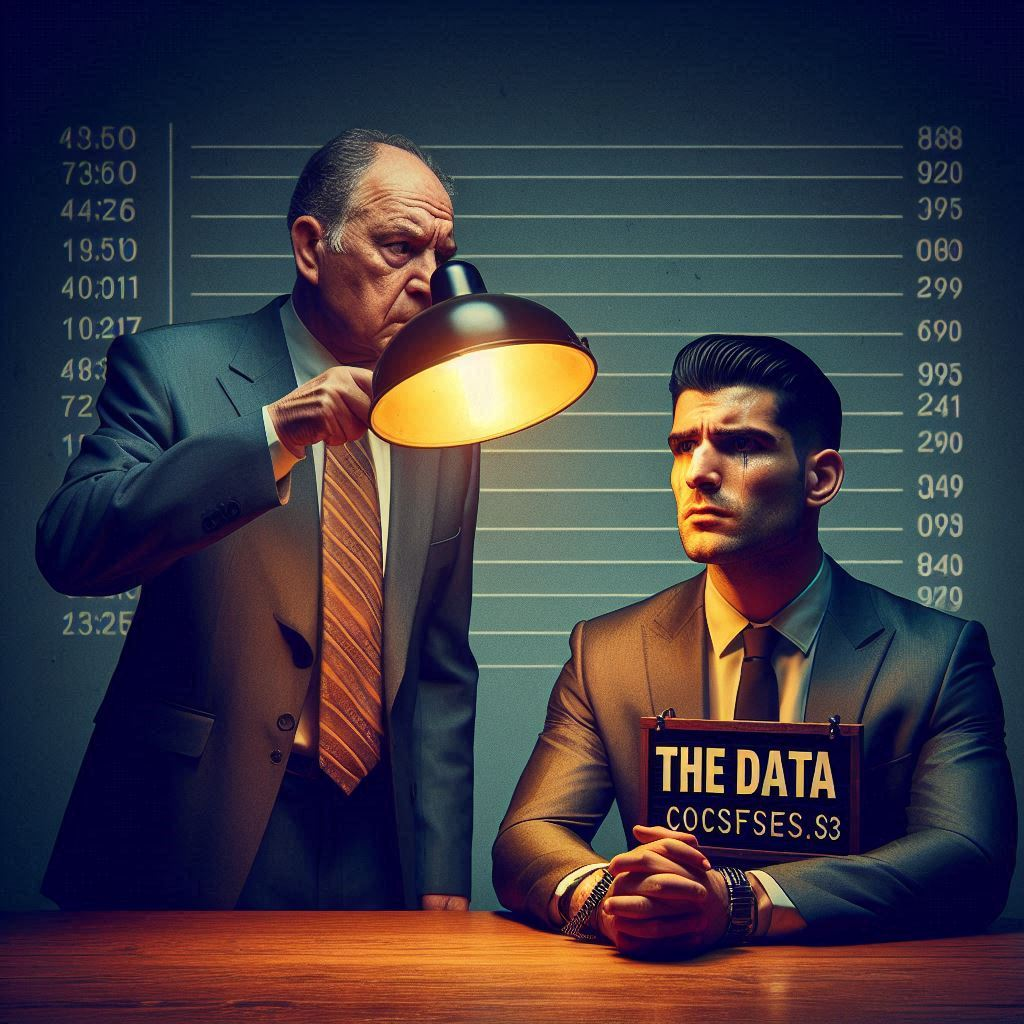

In [2]:
from IPython.display import Image
Image(filename=notebook_path + '/images/faire_parler_les_données.jpg', width=500)

(Image générée avec DALL.E 3)

## 1. Introduction : exemple des textes de romans classiques

Dans cette introduction on illustre à travers un exemple que les données peuvent nous en dire beaucoup, si on sait comment les faire parler

### Tracer les classiques

Dans cet exemple, nous allons explorer les statistiques de deux romans classiques : *Les aventures de Huckleberry Finn* de Mark Twain et *Little Women* de Louisa May Alcott (dont le titre de la traduction française est *Les quatres filles du docteur March*). Un ordinateur peut "lire" le texte de n'importe quel livre très rapidement. Les livres publiés avant 1923 sont actuellement dans le *domaine public*, ce qui signifie que tout le monde a le droit de copier ou d'utiliser le texte de quelque manière que ce soit. Le [Projet Gutenberg](http://www.gutenberg.org/) est un site web qui publie des livres du domaine public en ligne. En utilisant Python, nous pouvons charger le texte de ces livres directement depuis le web.

Cet exemple a pour but d'illustrer certains des grands thèmes de ce cours. Ne vous inquiétez pas si les détails du code python n'ont pas encore de sens. Concentrez-vous plutôt sur l'interprétation des images générées ci-dessous. Les sections suivantes du texte décriront les caractéristiques du langage de programmation Python utilisé ci-dessous et non traitée en introduction à la science informatique.

Tout d'abord, nous lisons le texte des deux livres en listes de chapitres, appelées `huck_finn_chapters` et `little_women_chapters`. En Python, un nom ne peut pas contenir d'espace, et nous utiliserons donc souvent un trait de soulignement `_` à la place d'un espace. Les `=` dans les lignes ci-dessous donnent un nom à gauche au résultat d'un calcul décrit à droite. Un *Uniform Resource Locator* ("localisateur de ressources uniformes") ou *URL* est une adresse sur Internet pour un contenu ; dans ce cas, le texte d'un livre. Le symbole `#` commence un commentaire, qui est ignoré par l'ordinateur mais utile pour les personnes qui lisent le code.

In [3]:
# Read two books, fast!

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

Un ordinateur peut nous donner un aperçu de la structure du texte d'un livre, sans avoir besoin d'en comprendre le contenu. Le nom `huck_finn_chapters` est actuellement lié à une liste de tous les chapitres du livre. Nous pouvons les placer dans un tableau pour voir comment commence chaque chapitre.

In [4]:
# Display the chapters of Huckleberry Finn in a table.

pandas.DataFrame({'Chapters' : huck_finn_chapters})

,Chapters
0,I. YOU don't know about me without you have re...
1,II. WE went tiptoeing along a path amongst the...
2,"III. WELL, I got a good going-over in the morn..."
3,"IV. WELL, three or four months run along, and ..."
4,V. I had shut the door to. Then I turned aroun...
...,...
38,XXXIX. IN the morning we went up to the villag...
39,XL. WE was feeling pretty good after breakfast...
40,"XLI. THE doctor was an old man; a very nice, k..."
41,XLII. THE old man was uptown again before brea...


Chaque chapitre commence par un numéro de chapitre en chiffres romains, suivi de la première phrase du chapitre. Le Projet Gutenberg a imprimé le premier mot de chaque chapitre en majuscules.

### Personnages littéraires

Les Aventures de Huckleberry Finn décrivent le voyage de Huck et Jim le long du Mississippi. Tom Sawyer les rejoint vers la fin, alors que l'action s'intensifie. Après avoir chargé le texte, nous pouvons rapidement visualiser combien de fois ces personnages ont été mentionnés dans chaque chapitre.

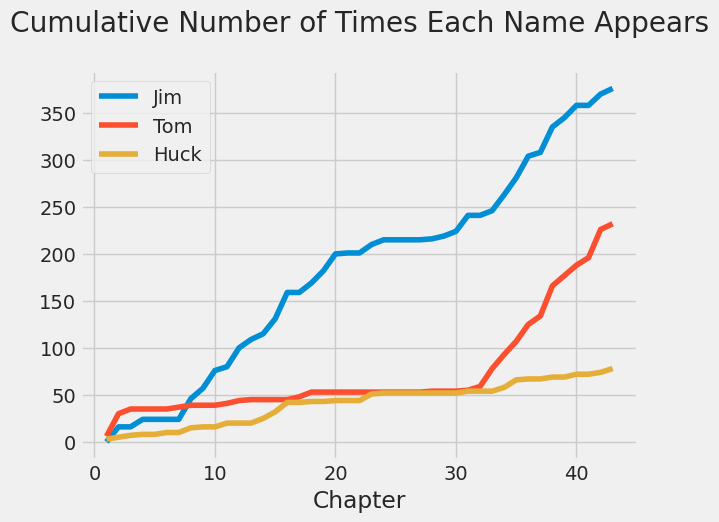

In [5]:
# Get the cumulative counts the names Jim, Tom, and Huck appear in each chapter.

counts = pandas.DataFrame({
        'Jim' : np.cumsum(np.char.count(huck_finn_chapters, 'Jim')),
        'Tom' : np.cumsum(np.char.count(huck_finn_chapters, 'Tom')),
        'Huck' : np.cumsum(np.char.count(huck_finn_chapters, 'Huck'))
})

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

counts['Chapter'] = np.arange(1, 44, 1)

fig = counts.plot(x='Chapter')
t = fig.set_title('Cumulative Number of Times Each Name Appears', y=1.08)

Dans le graphique ci-dessus, l'axe horizontal indique les numéros de chapitre et l'axe vertical le nombre de fois où chaque personnage a été mentionné jusqu'à ce chapitre inclus.

Vous pouvez constater que Jim est un personnage central par le grand nombre de fois où son nom apparaît. Remarquez que Tom est à peine mentionné pendant la majeure partie du livre, jusqu'à ce qu'il arrive et rejoigne Huck et Jim, après le chapitre 30. Sa courbe et celle de Jim montent en flèche à ce moment-là, car l'action les impliquant tous les deux s'intensifie. Quant à Huck, son nom n'apparaît pratiquement pas, car il est le narrateur.

Le livre *Little Women* raconte l'histoire de quatre sœurs qui grandissent ensemble pendant la guerre civile. Dans ce livre, les numéros de chapitre sont écrits en toutes lettres et les titres de chapitre sont écrits en majuscules.

In [6]:
# The chapters of Little Women, in a table
pandas.DataFrame({'Chapters' : little_women_chapters})

,Chapters
0,"ONE PLAYING PILGRIMS ""Christmas won't be Chris..."
1,TWO A MERRY CHRISTMAS Jo was the first to wake...
2,"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?..."
3,"FOUR BURDENS ""Oh, dear, how hard it does seem ..."
4,"FIVE BEING NEIGHBORLY ""What in the world are y..."
...,...
42,FORTY-THREE SURPRISES Jo was alone in the twil...
43,"FORTY-FOUR MY LORD AND LADY ""Please, Madam Mot..."
44,FORTY-FIVE DAISY AND DEMI I cannot feel that I...
45,FORTY-SIX UNDER THE UMBRELLA While Laurie and ...


Nous pouvons suivre les mentions des personnages principaux pour en savoir plus sur l'intrigue de ce livre. La protagoniste Jo interagit régulièrement avec ses sœurs Meg, Beth et Amy, jusqu'au chapitre 27 où elle déménage seule à New York.

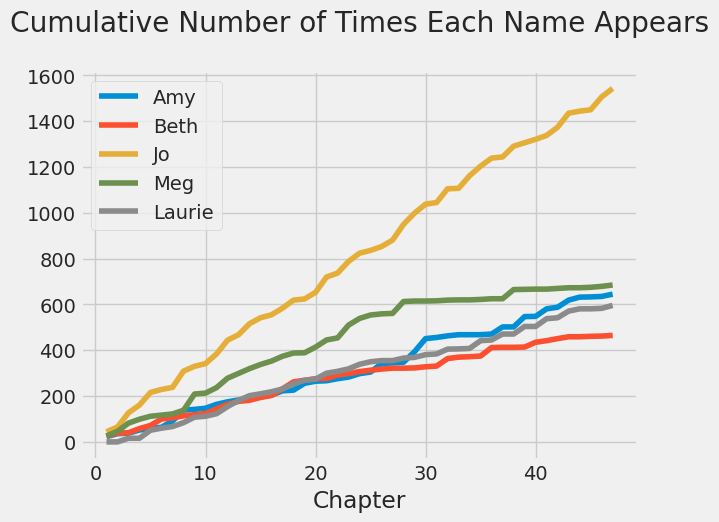

In [7]:
# Get the cumulative counts of the names in the chapters of Little Women

counts = pandas.DataFrame({
        'Amy' : np.cumsum(np.char.count(little_women_chapters, 'Amy')),
        'Beth' : np.cumsum(np.char.count(little_women_chapters, 'Beth')),
        'Jo' : np.cumsum(np.char.count(little_women_chapters, 'Jo')),
        'Meg' : np.cumsum(np.char.count(little_women_chapters, 'Meg')),
        'Laurie' : np.cumsum(np.char.count(little_women_chapters, 'Laurie'))
})

# Plot the cumulative counts.

counts['Chapter'] = np.arange(1, 48, 1)
fig = counts.plot(x="Chapter")
t = fig.set_title('Cumulative Number of Times Each Name Appears', y=1.08)

Laurie est un jeune homme qui épouse l'une des filles à la fin. Essayez de deviner laquelle en observant attentivement le graphique ci-dessus.

### Nombres de caractères

Dans certaines situations, les relations que nous observons entre différentes variables nous permettent de faire des prédictions. Nous allons explorer dans ce cours comment faire des prédictions précises à partir d'informations incomplètes et nous développerons des méthodes pour combiner plusieurs sources d'informations incertaines afin de prendre des décisions.

Pour illustrer la visualisation d'informations provenant de sources multiples, utilisons d'abord l'ordinateur pour obtenir des informations qu'il serait fastidieux d'obtenir à la main. Dans le contexte des romans, le mot « caractère » signifie un symbole imprimé tel qu'une lettre, un chiffre ou un symbole de ponctuation. Ici, nous demandons à l'ordinateur de compter le nombre de caractères et le nombre de points dans chaque chapitre de *Huckleberry Finn* et de *Little Women*.

In [8]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_huck_finn = pandas.DataFrame({
        'Chapter Length' : [len(s) for s in huck_finn_chapters],
        'Number of Periods' : np.char.count(huck_finn_chapters, '.')
})
chars_periods_little_women = pandas.DataFrame({
        'Chapter Length' : [len(s) for s in little_women_chapters],
        'Number of Periods' : np.char.count(little_women_chapters, '.')
})

Voici les données pour *Huckleberry Finn*. Chaque ligne du tableau correspond à un chapitre du roman et indique le nombre de caractères ainsi que le nombre de points dans le chapitre. Il n'est pas surprenant de constater qu'en général les chapitres comportant moins de caractères ont également tendance à comporter moins de points : plus le chapitre est court, moins il y a de phrases, et vice versa. Cette relation n'est toutefois pas entièrement prévisible, car les phrases sont de longueur variable et peuvent comporter d'autres signes de ponctuation, tels que des points d'interrogation.

In [9]:
chars_periods_huck_finn

,Chapter Length,Number of Periods
0,7026,66
1,11982,117
2,8529,72
3,6799,84
4,8166,91
...,...,...
38,10864,96
39,11534,60
40,13430,77
41,15754,92


In [10]:
chars_periods_little_women

,Chapter Length,Number of Periods
0,21759,189
1,22148,188
2,20558,231
3,25526,195
4,23395,255
...,...,...
42,33202,305
43,10289,95
44,12558,96
45,27094,234


Vous pouvez constater que les chapitres de *Little Women* sont en général plus longs que ceux de *Huckleberry Finn*. Voyons si ces deux variables simples - la longueur et le nombre de points dans chaque chapitre - peuvent nous en dire plus sur les deux livres. Une façon d'y parvenir est de représenter les deux ensembles de données sur les mêmes axes.

Dans le graphique ci-dessous, un point correspond à chaque chapitre de chaque livre. Les points bleus correspondent à *Huckleberry Finn* et les points dorés à *Little Women*. L'axe horizontal représente le nombre de points et l'axe vertical le nombre de caractères.

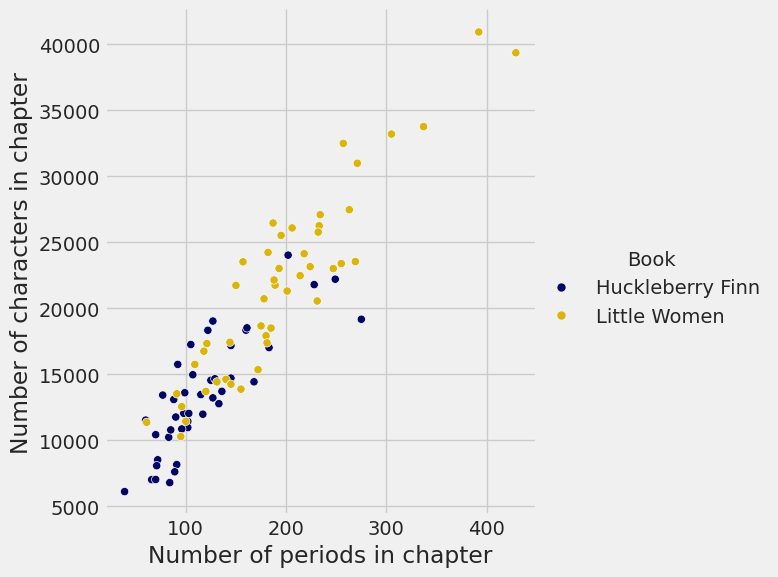

In [11]:
# Let's first assemble the two tables into one
chars_periods_huck_finn['Book'] = 'Huckleberry Finn'
chars_periods_little_women['Book'] = 'Little Women'
chars_periods_all = pandas.concat([chars_periods_huck_finn, chars_periods_little_women])

color_palette = seaborn.xkcd_palette(['darkblue', 'gold'])
fig = seaborn.relplot(data=chars_periods_all, kind='scatter', x='Number of Periods', y='Chapter Length', hue='Book',
                      height=6, aspect=1, palette = color_palette)
t = plots.xlabel('Number of periods in chapter')
t = plots.ylabel('Number of characters in chapter')

Le graphique nous montre que de nombreux chapitres de *Little Women*, mais pas tous, sont plus longs que ceux de *Huckleberry Finn*, comme nous l'avions observé en regardant simplement les chiffres. Mais il nous montre aussi quelque chose de plus. Remarquez que les points bleus sont grossièrement regroupés autour d'une ligne droite, tout comme les points jaunes. De plus, il semble que les deux couleurs de points puissent être regroupées autour de la même ligne droite.

Maintenant, regardez tous les chapitres qui contiennent environ 100 points finaux. Le graphique montre que ces chapitres contiennent environ 10 000 à 15 000 caractères, en gros. Cela représente environ 100 à 150 caractères par point final.

En effet, il ressort de l'analyse de l'intrigue qu'en moyenne, les deux livres ont tendance à contenir entre 100 et 150 caractère par point final, à titre d'estimation très approximative. Peut-être ces deux grands romans du XIXe siècle annonçaient-ils quelque chose qui nous est si familier aujourd'hui : la limite de 140 caractères de X (ex-Twitter) ?

## 2. Manipulation et description des données

La deuxième partie se focalise sur les bases de la représentation et la manipulation de données avec la librairie pandas de python (création de table, accès par colonne et/ou par ligne, accès par condition, ajout/suppression de colonne, tri, concatenation, jointures, groupement et application d'une fonction, chargement/sauvegarde dans un fichier) en en profitant pour introduire quelques statistiques descriptives (moyenne, variance, écart-type, étendue)

In [12]:
path_data = 'assets/data/'
cones = pandas.read_csv(path_data + 'cones.csv')
nba = pandas.read_csv(path_data + 'nba_salaries.csv') 
nba = nba.rename(columns={"'15-'16 SALARY" : "SALARY"})
movies = pandas.read_csv(path_data + 'movies_by_year.csv')

### Représentation des données sous forme de *tableaux* ou *images* : premiers pas avec la bibliothèque pandas en python

#### Programmation python

La programmation peut améliorer considérablement notre capacité à collecter et à analyser des informations sur le monde, ce qui peut conduire à des découvertes et à de meilleures décisions. En science des données, l'objectif de l'écriture d'un programme est d'ordonner à un ordinateur d'effectuer les étapes d'une analyse. Les ordinateurs ne peuvent pas étudier le monde seuls. Il faut décrire précisément les étapes que l'ordinateur doit suivre pour collecter et analyser les données, et ces étapes sont exprimées par des programmes.

#### La bibliothèque pandas
Nous pouvons utiliser Python pour analyser des données à l'aide de la bibliothèque pandas. Nous travaillerons avec des données stockées dans des structures de type DataFrame, qu'on peut voir comme une forme de tableau.

Les tableaux sont un moyen fondamental de représenter des ensembles de données. Un tableau peut être considéré de deux manières :
* une séquence de colonnes nommées qui décrivent chacune un attribut unique de toutes les entrées d'un ensemble de données, ou
* une séquence de lignes contenant chacune toutes les informations relatives à un seul individu dans un ensemble de données.

Nous étudierons les tableaux en détail dans les prochaines séances. Pour l'instant, nous nous contenterons de présenter quelques méthodes sans entrer dans les détails techniques.

La table `cones` a été importée pour nous ; nous verrons plus tard comment, mais ici nous allons simplement travailler avec elle. Tout d'abord, jetons-y un coup d'oeil.

In [13]:
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


Le tableau comporte six lignes. Chaque ligne correspond à un cornet de glace. Les cornets de glace sont les *individus*.

Chaque cornet possède trois attributs : le parfum, la couleur et le prix. Chaque colonne contient les données relatives à l'un de ces attributs, de sorte que toutes les entrées d'une même colonne sont du même type. Chaque colonne a une étiquette. Nous nous référerons aux colonnes par leurs étiquettes.

Une méthode de tableau est semblable à une fonction, mais elle doit opérer sur un tableau. L'appel ressemble donc à

`nom_de_la_table.méthode(arguments)`

Par exemple, si vous voulez voir seulement les deux premières lignes d'un tableau, vous pouvez utiliser la méthode `head` des DataFrame pandas.

In [14]:
cones.head(2)

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75


Vous pouvez remplacer 2 par n'importe quel nombre de lignes. Si vous demandez plus de six, vous n'obtiendrez que six, car `cones` n'a que six lignes.

#### Choisir des ensembles de colonnes
Nous pouvons *indexer* une colonne du tableau `cones` à l'aide de la syntaxe illustrée ci-dessous, pour créer un nouveau tableau composé uniquement des colonnes spécifiées.

In [15]:
cones['Flavor']

0    strawberry
1     chocolate
2     chocolate
3    strawberry
4     chocolate
5     bubblegum
Name: Flavor, dtype: object

Le tableau d'origine reste donc inchangé.

In [16]:
cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


Vous pouvez sélectionner plus d'une colonne en donnant les intitulés des colonnes à sélectionner sous la forme d'une liste python.

In [17]:
cones[['Flavor', 'Price']]

,Flavor,Price
0,strawberry,3.55
1,chocolate,4.75
2,chocolate,5.25
3,strawberry,5.25
4,chocolate,5.25
5,bubblegum,4.75


Vous pouvez également *supprimer* les colonnes que vous ne voulez pas. Le tableau ci-dessus peut être créé en supprimant la colonne `Color`. L'argument `axis=1` sert à indiquer que nous cherchons à supprimer une colonne et non une ligne du tableau.

In [18]:
cones.drop('Color', axis=1)

,Flavor,Price
0,strawberry,3.55
1,chocolate,4.75
2,chocolate,5.25
3,strawberry,5.25
4,chocolate,5.25
5,bubblegum,4.75


Vous pouvez nommer ce nouveau tableau et le consulter à nouveau en tapant simplement son nom.

In [19]:
no_colors = cones.drop('Color', axis=1)

no_colors

,Flavor,Price
0,strawberry,3.55
1,chocolate,4.75
2,chocolate,5.25
3,strawberry,5.25
4,chocolate,5.25
5,bubblegum,4.75


Comme `select`, la méthode `drop` crée un tableau plus petit et laisse le tableau original inchangé. Afin d'explorer vos données, vous pouvez créer un nombre quelconque de tableaux plus petits en choisissant ou en supprimant des colonnes. Cela n'affectera pas votre tableau de données d'origine.

#### Tri des lignes

La méthode `sort_values` crée un nouveau tableau en classant les lignes du tableau original par ordre croissant des valeurs de la colonne spécifiée. Ici, le tableau `cones` a été trié par ordre croissant du prix des cônes.

In [20]:
cones.sort_values('Price')

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
5,bubblegum,pink,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25


Pour trier par ordre décroissant, vous pouvez utiliser un argument *optionnel* à `sort_values`. Comme le nom l'indique, les arguments optionnels n'ont pas besoin d'être utilisés, mais ils peuvent l'être si vous voulez changer le comportement par défaut d'une méthode.

Par défaut, `sort_values` trie par ordre croissant les valeurs de la colonne spécifiée. Pour trier par ordre décroissant, utilisez l'argument optionnel `ascending=False`.

In [21]:
cones.sort_values('Price', ascending=False)

,Flavor,Color,Price
3,strawberry,pink,5.25
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25
1,chocolate,light brown,4.75
5,bubblegum,pink,4.75
0,strawberry,pink,3.55


Comme `select` et `drop`, la méthode `sort` laisse la table originale inchangée.

#### Sélectionner les lignes qui satisfont une condition
Il est possible d'indexer une table pour récupérer un nouveau tableau composé uniquement des lignes qui satisfont une condition donnée. Dans cette section, nous travaillerons avec une condition très simple, qui est que la valeur d'une colonne spécifiée doit être égale à une valeur que nous spécifions également.

Le code dans la cellule ci-dessous crée un tableau composé uniquement des lignes correspondant aux cornets de chocolat.

In [22]:
cones[cones['Flavor'] == 'chocolate']

,Flavor,Color,Price
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
4,chocolate,dark brown,5.25


Regardons ce que fait la partie entre crochets `cones['Flavor'] == 'chocolate'`.

In [23]:
cones['Flavor'] == 'chocolate'

0    False
1     True
2     True
3    False
4     True
5    False
Name: Flavor, dtype: bool

Pour chaque ligne du tableau elle spécifie une valeur booléenne : `True` si la ligne doit être incluse et `False`sinon. 

Il est important de fournir la valeur désirée exactement. Par exemple, si nous spécifions `Chocolate` au lieu de `chocolate`, alors le code ci-dessus ne trouvera correctement aucune ligne où la saveur est `Chocolate`.

In [24]:
cones[cones['Flavor'] == 'Chocolate']

,Flavor,Color,Price


Comme toutes les autres méthodes de table de cette section, ces opérations laissent la table `cones` inchangée.

#### Exemple : Salaires dans la NBA

"La NBA est la ligue sportive professionnelle la mieux payée au monde", [a rapporté CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) en mars 2016. Le tableau `nba` contient les [salaires de tous les joueurs de la National Basketball Association](https://www.statcrunch.com/app/index.php?dataid=1843341) en 2015-2016.

Chaque ligne représente un joueur. Les colonnes sont :

| **Étiquette de la colonne** | Description                                           |
|-----------------------------|-------------------------------------------------------|
| `PLAYER`                    | Nom du joueur                                         |
| `POSITION`                  | Position du joueur dans l'équipe                      |
| `TEAM`                      | Nom de l'équipe                                       |
|`SALAIRE`                    | Salaire du joueur en 2015-2016, en millions de dollars|
 
Le code pour les positions est PG (Point Guard), SG (Shooting Guard), PF (Power Forward), SF (Small Forward), et C (Center). Mais ce qui suit n'implique pas de détails sur la façon dont le basket-ball est joué.

La première ligne montre que Paul Millsap, attaquant des Atlanta Hawks, a perçu un salaire de près de 18,7 millions de dollars en 2015-2016.

In [25]:
nba

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


Les fans de Stephen Curry peuvent trouver sa rangée en utilisant la méthode de sélection des rangées vue ci-dessus.

In [26]:
nba[nba['PLAYER'] == 'Stephen Curry']

,PLAYER,POSITION,TEAM,SALARY
121,Stephen Curry,PG,Golden State Warriors,11.370786


Nous pouvons également créer une nouvelle table appelée `warriors` contenant uniquement les données des Golden State Warriors.

In [27]:
warriors = nba[nba['TEAM'] == 'Golden State Warriors']
warriors

,PLAYER,POSITION,TEAM,SALARY
117,Klay Thompson,SG,Golden State Warriors,15.501000
118,Draymond Green,PF,Golden State Warriors,14.260870
119,Andrew Bogut,C,Golden State Warriors,13.800000
120,Andre Iguodala,SF,Golden State Warriors,11.710456
121,Stephen Curry,PG,Golden State Warriors,11.370786
122,Jason Thompson,PF,Golden State Warriors,7.008475
123,Shaun Livingston,PG,Golden State Warriors,5.543725
124,Harrison Barnes,SF,Golden State Warriors,3.873398
125,Marreese Speights,C,Golden State Warriors,3.815000
126,Leandro Barbosa,SG,Golden State Warriors,2.500000


Par défaut, les 5 premières et 5 dernières lignes d'un tableau sont affichées. Vous pouvez utiliser head pour en afficher plus ou moins.

In [28]:
nba.head(20)

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
5,Thabo Sefolosha,SF,Atlanta Hawks,4.000000
6,Mike Scott,PF,Atlanta Hawks,3.333333
7,Kent Bazemore,SF,Atlanta Hawks,2.000000
8,Dennis Schroder,PG,Atlanta Hawks,1.763400
9,Tim Hardaway Jr.,SG,Atlanta Hawks,1.304520


Le tableau `nba` est trié par ordre alphabétique des noms d'équipes. Pour voir comment les joueurs ont été payés en 2015-2016, il est utile de trier les données par salaire. Rappelez-vous que par défaut, le tri se fait par ordre croissant.

In [29]:
nba.sort_values('SALARY')

,PLAYER,POSITION,TEAM,SALARY
267,Thanasis Antetokounmpo,SF,New York Knicks,0.030888
326,Jordan McRae,SG,Phoenix Suns,0.049709
327,Cory Jefferson,PF,Phoenix Suns,0.049709
324,Orlando Johnson,SG,Phoenix Suns,0.055722
325,Phil Pressey,PG,Phoenix Suns,0.055722
...,...,...,...,...
131,Dwight Howard,C,Houston Rockets,22.359364
255,Carmelo Anthony,SF,New York Knicks,22.875000
72,LeBron James,SF,Cleveland Cavaliers,22.970500
29,Joe Johnson,SF,Brooklyn Nets,24.894863


Ces chiffres sont quelque peu difficiles à comparer car certains de ces joueurs ont changé d'équipe en cours de saison et ont reçu des salaires de plus d'une équipe ; seul le salaire de la dernière équipe apparaît dans le tableau.

Le rapport de CNN porte sur l'autre extrémité de l'échelle des salaires, à savoir les joueurs qui figuraient parmi les mieux payés au monde. Pour identifier ces joueurs, nous pouvons les classer par ordre décroissant de salaire et examiner les premières lignes.

In [30]:
nba.sort_values('SALARY', ascending=False)

,PLAYER,POSITION,TEAM,SALARY
169,Kobe Bryant,SF,Los Angeles Lakers,25.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
72,LeBron James,SF,Cleveland Cavaliers,22.970500
255,Carmelo Anthony,SF,New York Knicks,22.875000
131,Dwight Howard,C,Houston Rockets,22.359364
...,...,...,...,...
325,Phil Pressey,PG,Phoenix Suns,0.055722
324,Orlando Johnson,SG,Phoenix Suns,0.055722
326,Jordan McRae,SG,Phoenix Suns,0.049709
327,Cory Jefferson,PF,Phoenix Suns,0.049709


Le regretté Kobe Bryant a été le joueur de la NBA qui a gagné le plus d'argent en 2015-2016.

#### Création de tableaux

Pour utiliser les tableaux, il faut importer le module pandas, la librairie python la plus utilisée pour la manipulation de données

In [31]:
import pandas

Des tables vides peuvent être créées à l'aide de la fonction `DataFrame` du module pandas. Un tableau vide est utile car il peut être étendu pour contenir de nouvelles lignes et colonnes.

In [32]:
df = pandas.DataFrame()
df

""


On peut ajouter une colonne en indexant une table par le nom de la colonne souhaitée et en lui assignant la liste des valeurs souhaitée dans cette colonne pour chaque ligne du tableau.

Par exemple pour créer une colonne `Number of petals` dans notre table vide :

In [33]:
df['Number of petals'] = [8, 34, 5]
df

,Number of petals
0,8
1,34
2,5


Pour ajouter deux colonnes (ou plus), on peut les ajouter une par une (attention toutes les colonnes doivent avoir la même longueur, sinon une erreur se produira). 

In [34]:
flowers = pandas.DataFrame()
flowers['Number of petals'] = [8, 34, 5]
flowers['Name'] = ['lotus', 'sunflower', 'rose']
flowers['Color'] = ['pink', 'yellow', 'red']

flowers

,Number of petals,Name,Color
0,8,lotus,pink
1,34,sunflower,yellow
2,5,rose,red


Nous pouvons aussi créer un tableau directement en spécifiant les noms des colonnes comme clés d'un [dictionnaire python](https://www.w3schools.com/PYTHON/python_dictionaries.asp) avec comme valeurs associé à chaque clé, la liste des valeurs souhaitée dans la colonne correspondante. 

In [35]:

flowers_dict = {'Number of petals' : [8, 34, 5],
                'Name' : ['lotus', 'sunflower', 'rose'],
                'Color' : ['pink', 'yellow', 'red']
}

flowers = pandas.DataFrame(flowers_dict)
flowers

,Number of petals,Name,Color
0,8,lotus,pink
1,34,sunflower,yellow
2,5,rose,red


La création de tableaux de cette manière implique beaucoup de saisie. Si les données ont déjà été saisies quelque part, il est généralement possible d'utiliser Python pour les lire dans un tableau, au lieu de les saisir cellule par cellule.

Souvent, les tableaux sont créés à partir de fichiers contenant des valeurs séparées par des virgules. Ces fichiers sont appelés fichiers CSV.

Ci-dessous, nous utilisons la méthode Table `read_csv` de la librairie pandas pour lire un fichier CSV qui contient certaines des données utilisées par Minard dans son graphique sur la campagne russe de Napoléon. Les données sont placées dans une table nommée `minard`.

In [36]:
minard = pandas.read_csv(path_data + 'minard.csv')
minard

,Longitude,Latitude,City,Direction,Survivors
0,32.0,54.8,Smolensk,Advance,145000
1,33.2,54.9,Dorogobouge,Advance,140000
2,34.4,55.5,Chjat,Advance,127100
3,37.6,55.8,Moscou,Advance,100000
4,34.3,55.2,Wixma,Retreat,55000
5,32.0,54.6,Smolensk,Retreat,24000
6,30.4,54.4,Orscha,Retreat,20000
7,26.8,54.3,Moiodexno,Retreat,12000


Nous utiliserons ce petit tableau pour démontrer certaines méthodes utiles. Nous utiliserons ensuite ces mêmes méthodes, et en développerons d'autres, sur des tableaux de données beaucoup plus importants.

#### La taille de la table

La méthode `len` appliquée à l'attribut `columns` d'un tableau donne le nombre de colonnes du tableau, et `len` appliqué directement au tableau lui-même donne le nombre de lignes.

In [37]:
len(minard.columns)

5

In [38]:
len(minard)

8

#### Étiquettes des colonnes

La méthode `columns` peut être utilisée pour lister les étiquettes de toutes les colonnes. Avec `minard`, cela ne nous apporte pas grand chose, mais cela peut être très utile pour les tableaux qui sont si grands que toutes les colonnes ne sont pas visibles à l'écran.

In [39]:
minard.columns

Index(['Longitude', 'Latitude', 'City', 'Direction', 'Survivors'], dtype='object')

Nous pouvons changer les étiquettes des colonnes en utilisant la méthode `relabeled`. Cette méthode crée une nouvelle table et laisse `minard` inchangé.

In [40]:
minard.rename(columns={'City': 'City Name'})

,Longitude,Latitude,City Name,Direction,Survivors
0,32.0,54.8,Smolensk,Advance,145000
1,33.2,54.9,Dorogobouge,Advance,140000
2,34.4,55.5,Chjat,Advance,127100
3,37.6,55.8,Moscou,Advance,100000
4,34.3,55.2,Wixma,Retreat,55000
5,32.0,54.6,Smolensk,Retreat,24000
6,30.4,54.4,Orscha,Retreat,20000
7,26.8,54.3,Moiodexno,Retreat,12000


Toutefois, cette méthode ne modifie pas le tableau original.

In [41]:
minard

,Longitude,Latitude,City,Direction,Survivors
0,32.0,54.8,Smolensk,Advance,145000
1,33.2,54.9,Dorogobouge,Advance,140000
2,34.4,55.5,Chjat,Advance,127100
3,37.6,55.8,Moscou,Advance,100000
4,34.3,55.2,Wixma,Retreat,55000
5,32.0,54.6,Smolensk,Retreat,24000
6,30.4,54.4,Orscha,Retreat,20000
7,26.8,54.3,Moiodexno,Retreat,12000


Il est courant d'attribuer le nom original `minard` à la nouvelle table, de sorte que toutes les utilisations futures de `minard` fassent référence à la table réétiquetée.

In [42]:
minard = minard.rename(columns={'City': 'City Name'})
minard

,Longitude,Latitude,City Name,Direction,Survivors
0,32.0,54.8,Smolensk,Advance,145000
1,33.2,54.9,Dorogobouge,Advance,140000
2,34.4,55.5,Chjat,Advance,127100
3,37.6,55.8,Moscou,Advance,100000
4,34.3,55.2,Wixma,Retreat,55000
5,32.0,54.6,Smolensk,Retreat,24000
6,30.4,54.4,Orscha,Retreat,20000
7,26.8,54.3,Moiodexno,Retreat,12000


#### Accéder aux données d'une colonne

Nous pouvons utiliser l'étiquette d'une colonne pour accéder au tableau de données qu'elle contient.

In [43]:
minard['Survivors']

0    145000
1    140000
2    127100
3    100000
4     55000
5     24000
6     20000
7     12000
Name: Survivors, dtype: int64

Les 5 colonnes sont indexées 0, 1, 2, 3 et 4. La colonne `Survivants` peut également être accédée en utilisant l'index de sa colonne (4). Pour cela, il faut utiliser l'attribut `iloc` qui permet d'utiliser le tableau pandas comme un tableau numpy.

In [44]:
minard.iloc[:,4]

0    145000
1    140000
2    127100
3    100000
4     55000
5     24000
6     20000
7     12000
Name: Survivors, dtype: int64

Les 8 éléments du tableau sont indexés 0, 1, 2, et ainsi de suite jusqu'à 7. On peut accéder aux éléments de la colonne en continuant d'utiliser `iloc`, comme pour tout tableau numpy.

In [45]:
minard.iloc[0,4]

np.int64(145000)

In [46]:
minard['Survivors'][0]

np.int64(145000)

#### Travailler avec les données d'une colonne

Les colonnes étant des tableaux, nous pouvons utiliser des opérations sur les tableaux pour découvrir de nouvelles informations. Par exemple, nous pouvons créer une nouvelle colonne contenant le pourcentage de tous les survivants dans chaque ville après Smolensk.

In [47]:
initial = minard['Survivors'][0]
minard['Percent Surviving'] = minard['Survivors']/initial
minard

,Longitude,Latitude,City Name,Direction,Survivors,Percent Surviving
0,32.0,54.8,Smolensk,Advance,145000,1.000000
1,33.2,54.9,Dorogobouge,Advance,140000,0.965517
2,34.4,55.5,Chjat,Advance,127100,0.876552
3,37.6,55.8,Moscou,Advance,100000,0.689655
4,34.3,55.2,Wixma,Retreat,55000,0.379310
5,32.0,54.6,Smolensk,Retreat,24000,0.165517
6,30.4,54.4,Orscha,Retreat,20000,0.137931
7,26.8,54.3,Moiodexno,Retreat,12000,0.082759


Pour que les proportions dans les nouvelles colonnes apparaissent sous forme de pourcentages, nous pouvons utiliser la méthode `.style.format` avec le format `{:,.2%}`. Ici, les accolades et les deux points `{:}` sont obligatoires, le `.2` signifie que l'on veut garder deux chiffres après la virgule, et le `%` signifie que l'on veut un pourcentage. Les options de formatages sont disponibles sur ce lien (en anglais) [https://fstring.help/cheat/](https://fstring.help/cheat/).

In [48]:
minard['Percent Surviving'] = minard['Percent Surviving'].map('{:,.2%}'.format)
minard

,Longitude,Latitude,City Name,Direction,Survivors,Percent Surviving
0,32.0,54.8,Smolensk,Advance,145000,100.00%
1,33.2,54.9,Dorogobouge,Advance,140000,96.55%
2,34.4,55.5,Chjat,Advance,127100,87.66%
3,37.6,55.8,Moscou,Advance,100000,68.97%
4,34.3,55.2,Wixma,Retreat,55000,37.93%
5,32.0,54.6,Smolensk,Retreat,24000,16.55%
6,30.4,54.4,Orscha,Retreat,20000,13.79%
7,26.8,54.3,Moiodexno,Retreat,12000,8.28%


#### Choisir des ensembles de colonnes

Pour créer une nouvelle table qui ne contient que les colonnes spécifiées, on peut utiliser une nouvelle liste Python.

In [49]:
minard[['Longitude', 'Latitude']]

,Longitude,Latitude
0,32.0,54.8
1,33.2,54.9
2,34.4,55.5
3,37.6,55.8
4,34.3,55.2
5,32.0,54.6
6,30.4,54.4
7,26.8,54.3


La même sélection peut être effectuée en utilisant des indices de colonne au lieu d'étiquettes à l'aide de la méthode `iloc`.

In [50]:
minard.iloc[:,[0, 1]]

,Longitude,Latitude
0,32.0,54.8
1,33.2,54.9
2,34.4,55.5
3,37.6,55.8
4,34.3,55.2
5,32.0,54.6
6,30.4,54.4
7,26.8,54.3


La sélection d'une colonne est un nouveau tableau, même si vous ne sélectionnez qu'une seule colonne.

In [51]:
minard['Survivors']

0    145000
1    140000
2    127100
3    100000
4     55000
5     24000
6     20000
7     12000
Name: Survivors, dtype: int64

Une autre façon de créer une nouvelle table composée d'un ensemble de colonnes est de "supprimer" les colonnes dont vous ne voulez pas.

In [52]:
minard.drop(columns=['Longitude', 'Latitude', 'Direction'])

,City Name,Survivors,Percent Surviving
0,Smolensk,145000,100.00%
1,Dorogobouge,140000,96.55%
2,Chjat,127100,87.66%
3,Moscou,100000,68.97%
4,Wixma,55000,37.93%
5,Smolensk,24000,16.55%
6,Orscha,20000,13.79%
7,Moiodexno,12000,8.28%


Ni la selection ni `drop` ne modifient la table d'origine. Au lieu de cela, ils créent de nouvelles tables plus petites qui partagent les mêmes données. Le fait que la table originale soit préservée est utile ! Vous pouvez générer plusieurs tableaux différents qui ne prennent en compte que certaines colonnes sans craindre qu'une analyse n'affecte l'autre.

In [53]:
minard

,Longitude,Latitude,City Name,Direction,Survivors,Percent Surviving
0,32.0,54.8,Smolensk,Advance,145000,100.00%
1,33.2,54.9,Dorogobouge,Advance,140000,96.55%
2,34.4,55.5,Chjat,Advance,127100,87.66%
3,37.6,55.8,Moscou,Advance,100000,68.97%
4,34.3,55.2,Wixma,Retreat,55000,37.93%
5,32.0,54.6,Smolensk,Retreat,24000,16.55%
6,30.4,54.4,Orscha,Retreat,20000,13.79%
7,26.8,54.3,Moiodexno,Retreat,12000,8.28%


Toutes les méthodes que nous avons utilisées ci-dessus peuvent être appliquées à n'importe quel tableau.

#### Tri des lignes

"La NBA est la ligue sportive professionnelle la mieux payée au monde", [a rapporté CNN](http://edition.cnn.com/2015/12/04/sport/gallery/highest-paid-nba-players/) en mars 2016. La table `nba_salaries` contient les salaires de tous les joueurs de la National Basketball Association en 2015-2016.

Chaque ligne représente un joueur. Les colonnes sont :

| Les colonnes sont les suivantes : - **Étiquette de la colonne** | Description
|--------------------|-----------------------------------------------------|
| `PLAYER` | Nom du joueur | `POSITION` | Position du joueur dans l'équipe
| `POSITION` | Position du joueur dans l'équipe | `TEAM` | Nom de l'équipe
| `TEAM` | Nom de l'équipe |
|``SALAIRE'15-'16` | Salaire du joueur en 2015-2016, en millions de dollars|
 
Le code des postes est PG (Point Guard), SG (Shooting Guard), PF (Power Forward), SF (Small Forward) et C (Center). Mais ce qui suit n'implique pas de détails sur la façon dont le basket-ball est joué.

La première ligne montre que Paul Millsap, attaquant des Atlanta Hawks, a perçu un salaire de près de 18,7 millions de dollars en 2015-2016.

In [54]:
# This table can be found online: https://www.statcrunch.com/app/index.php?dataid=1843341
nba_salaries = pandas.read_csv(path_data + 'nba_salaries.csv')
nba_salaries

,PLAYER,POSITION,TEAM,'15-'16 SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


Le tableau contient 417 lignes, une pour chaque joueur. Seules 10 lignes sont affichées. La méthode `head` nous permet de spécifier le nombre de lignes, la valeur par défaut (aucune spécification) étant `5`.

In [55]:
nba_salaries.head(5)

,PLAYER,POSITION,TEAM,'15-'16 SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479


Parcourez une vingtaine de lignes et vous verrez qu'elles sont classées par ordre alphabétique du nom de l'équipe. Il est également possible de lister les mêmes lignes dans l'ordre alphabétique des noms de joueurs en utilisant la méthode `sort_values`. L'argument de `sort_values` est un libellé de colonne ou un index.

In [56]:
nba_salaries.sort_values('PLAYER').head(5)

,PLAYER,POSITION,TEAM,'15-'16 SALARY
68,Aaron Brooks,PG,Chicago Bulls,2.250000
291,Aaron Gordon,PF,Orlando Magic,4.171680
59,Aaron Harrison,SG,Charlotte Hornets,0.525093
235,Adreian Payne,PF,Minnesota Timberwolves,1.938840
1,Al Horford,C,Atlanta Hawks,12.000000


Pour examiner les salaires des joueurs, il serait beaucoup plus utile que les données soient classées par salaire.

Pour ce faire, nous allons d'abord simplifier le libellé de la colonne des salaires (pour des raisons de commodité), puis trier les données en fonction du nouveau libellé "SALARY".

Cela permet de classer toutes les lignes du tableau par ordre *croissant* de salaire, le salaire le plus bas apparaissant en premier. Le résultat est un nouveau tableau avec les mêmes colonnes que l'original mais avec les lignes réarrangées.

In [57]:
nba = nba_salaries.rename(columns={"'15-'16 SALARY": 'SALARY'})
nba.sort_values('SALARY')

,PLAYER,POSITION,TEAM,SALARY
267,Thanasis Antetokounmpo,SF,New York Knicks,0.030888
326,Jordan McRae,SG,Phoenix Suns,0.049709
327,Cory Jefferson,PF,Phoenix Suns,0.049709
324,Orlando Johnson,SG,Phoenix Suns,0.055722
325,Phil Pressey,PG,Phoenix Suns,0.055722
...,...,...,...,...
131,Dwight Howard,C,Houston Rockets,22.359364
255,Carmelo Anthony,SF,New York Knicks,22.875000
72,LeBron James,SF,Cleveland Cavaliers,22.970500
29,Joe Johnson,SF,Brooklyn Nets,24.894863


Ces chiffres sont quelque peu difficiles à comparer car certains de ces joueurs ont changé d'équipe au cours de la saison et ont reçu des salaires de plus d'une équipe ; seul le salaire de la dernière équipe apparaît dans le tableau. Le meneur de jeu Phil Pressey, par exemple, est passé de Philadelphie à Phoenix au cours de l'année, et pourrait encore changer d'équipe pour rejoindre les Golden State Warriors.

Le rapport de CNN porte sur l'autre extrémité de l'échelle des salaires, à savoir les joueurs qui figurent parmi les mieux payés au monde.

Pour classer les lignes du tableau par ordre *décroissant* de salaire, nous devons utiliser `sort_values` avec l'option `ascending=False`.

In [58]:
nba.sort_values('SALARY', ascending=False)

,PLAYER,POSITION,TEAM,SALARY
169,Kobe Bryant,SF,Los Angeles Lakers,25.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
72,LeBron James,SF,Cleveland Cavaliers,22.970500
255,Carmelo Anthony,SF,New York Knicks,22.875000
131,Dwight Howard,C,Houston Rockets,22.359364
...,...,...,...,...
325,Phil Pressey,PG,Phoenix Suns,0.055722
324,Orlando Johnson,SG,Phoenix Suns,0.055722
326,Jordan McRae,SG,Phoenix Suns,0.049709
327,Cory Jefferson,PF,Phoenix Suns,0.049709


Kobe Bryant, lors de sa dernière saison avec les Lakers, a été le mieux payé avec un salaire de 25 millions de dollars. On notera que le MVP Stephen Curry n'apparaît pas dans le top 10. Il est bien plus loin dans la liste, comme nous le verrons plus tard.

#### Arguments nommés

La partie `ascending=False` de cette expression d'appel est appelée un *argument nommé*. Lorsqu'une fonction ou une méthode est appelée, chaque argument a une position et un nom. Les deux sont évidents dans le texte d'aide d'une fonction ou d'une méthode.

In [59]:
help(nba.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.

    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.

        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels.
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels.
    axis : "{0 or 'index', 1 or 'columns'}", default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must ma

Tout en haut de ce texte d'aide, la *signature* de la méthode `sort_values` apparaît :

    sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None)
    
Ceci décrit les positions, les noms et les valeurs par défaut des trois arguments de `sort_values`. Lorsque vous appelez cette méthode, vous pouvez utiliser soit des arguments positionnels, soit des arguments nommés, donc les deux appels suivants font exactement la même chose.

    sort('SALARY', ascending=False)
    sort(by='SALARY', ascending=False)
    
Lorsqu'un argument est simplement `True` ou `False`, il est utile d'inclure le nom de l'argument pour que la signification de la valeur de l'argument soit plus évidente.

#### Sélection des lignes spécifiées

Il arrive souvent que l'on veuille extraire uniquement les lignes correspondant à des entrées présentant une caractéristique particulière. Par exemple, nous ne voulons que les lignes correspondant aux Warriors, ou aux joueurs qui ont gagné plus de 10 millions de dollars. Ou encore, nous pouvons nous contenter d'extraire les cinq joueurs les mieux payés.

C'est exactement ce que fait l'attribut `iloc`: elle peut donner accès à un ensemble de lignes spécifiées. En utilisant un index de ligne ou un tableau d'index, on peut créer comme avec numpy un nouveau tableau composé uniquement de ces lignes.

Par exemple, si nous voulions seulement la première ligne de `nba`, nous pourrions utiliser `iloc` comme suit.

In [60]:
nba

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


In [61]:
nba.iloc[[0],]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659


Il s'agit d'un nouveau tableau contenant la seule ligne que nous avons spécifiée.

Nous pourrions également obtenir les quatrième, cinquième et sixième lignes en spécifiant une plage d'indices comme argument.

In [62]:
nba.iloc[np.arange(3, 6)]

,PLAYER,POSITION,TEAM,SALARY
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
5,Thabo Sefolosha,SF,Atlanta Hawks,4.000000


Si nous voulons un tableau des 5 joueurs les mieux payés, nous pouvons d'abord trier la liste par salaire et ensuite "prendre" les cinq premières lignes :

In [63]:
nba.sort_values('SALARY', ascending=False).iloc[np.arange(5)]

,PLAYER,POSITION,TEAM,SALARY
169,Kobe Bryant,SF,Los Angeles Lakers,25.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
72,LeBron James,SF,Cleveland Cavaliers,22.970500
255,Carmelo Anthony,SF,New York Knicks,22.875000
131,Dwight Howard,C,Houston Rockets,22.359364


#### Lignes correspondant à une caractéristique spécifiée
Le plus souvent, nous souhaitons accéder aux données d'un ensemble de lignes présentant une certaine caractéristique, mais dont nous ne connaissons pas les indices à l'avance. Par exemple, nous pourrions vouloir obtenir des données sur tous les joueurs qui ont gagné plus de 10 millions de dollars, mais nous ne voulons pas perdre de temps à compter les lignes dans le tableau trié.

Pour faire cela, on va faire quelque chose qui ressemble à la façon dont on sélectionne les colonnes que l'on veut afficher. A la place de mettre un nom de colonne entre crochets, on va spécifier, à l'aide d'opérateurs logiques, la condition que doivent respecter les lignes pour être affichées.

Dans le premier exemple, nous extrayons les données de tous ceux qui ont gagné plus de 10 millions de dollars. Nous allons donc écrire entre crochet `nba['SALARY'] > 10`.

In [64]:
nba[nba['SALARY'] > 10]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
30,Thaddeus Young,PF,Brooklyn Nets,11.235955
42,Al Jefferson,C,Charlotte Hornets,13.500000
...,...,...,...,...
368,DeMar DeRozan,SG,Toronto Raptors,10.050000
383,Gordon Hayward,SF,Utah Jazz,15.409570
400,John Wall,PG,Washington Wizards,15.851950
401,Nene Hilario,C,Washington Wizards,13.000000


Il y a 69 lignes dans le nouveau tableau, correspondant aux 69 joueurs qui ont gagné plus de 10 millions de dollars. Le fait de classer ces lignes dans l'ordre facilite l'analyse des données. DeMar DeRozan des Toronto Raptors était le plus "pauvre" de ce groupe, avec un salaire d'un peu plus de 10 millions de dollars.

In [65]:
nba[nba['SALARY'] > 10].sort_values('SALARY')

,PLAYER,POSITION,TEAM,SALARY
368,DeMar DeRozan,SG,Toronto Raptors,10.050000
298,Gerald Wallace,SF,Philadelphia 76ers,10.105855
204,Luol Deng,SF,Miami Heat,10.151612
144,Monta Ellis,SG,Indiana Pacers,10.300000
95,Wilson Chandler,SF,Denver Nuggets,10.449438
...,...,...,...,...
131,Dwight Howard,C,Houston Rockets,22.359364
255,Carmelo Anthony,SF,New York Knicks,22.875000
72,LeBron James,SF,Cleveland Cavaliers,22.970500
29,Joe Johnson,SF,Brooklyn Nets,24.894863


Combien Stephen Curry a-t-il gagné ? Pour obtenir la réponse, nous devons accéder à la ligne où la valeur de `PLAYER` est égale à `Stephen Curry`. Il s'agit d'un tableau composé d'une seule ligne :

In [66]:
nba[nba['PLAYER'] == 'Stephen Curry']

,PLAYER,POSITION,TEAM,SALARY
121,Stephen Curry,PG,Golden State Warriors,11.370786


Curry a gagné un peu moins de 11,4 millions de dollars. C'est beaucoup d'argent, mais c'est moins de la moitié du salaire de LeBron James. Vous trouverez ce salaire dans le tableau "Top 5" plus haut dans cette section, ou en remplaçant "Stephen Curry" par "LeBron James" dans la ligne de code ci-dessus.

In [67]:
print(nba[nba['TEAM'] == 'Golden State Warriors'])

                PLAYER POSITION                   TEAM     SALARY
117      Klay Thompson       SG  Golden State Warriors  15.501000
118     Draymond Green       PF  Golden State Warriors  14.260870
119       Andrew Bogut        C  Golden State Warriors  13.800000
120     Andre Iguodala       SF  Golden State Warriors  11.710456
121      Stephen Curry       PG  Golden State Warriors  11.370786
122     Jason Thompson       PF  Golden State Warriors   7.008475
123   Shaun Livingston       PG  Golden State Warriors   5.543725
124    Harrison Barnes       SF  Golden State Warriors   3.873398
125  Marreese Speights        C  Golden State Warriors   3.815000
126    Leandro Barbosa       SG  Golden State Warriors   2.500000
127       Festus Ezeli        C  Golden State Warriors   2.008748
128       Brandon Rush       SF  Golden State Warriors   1.270964
129       Kevon Looney       SF  Golden State Warriors   1.131960
130   Anderson Varejao       PF  Golden State Warriors   0.289755


Cette partie du tableau est déjà triée par salaire, car le tableau original répertorie les joueurs par salaire au sein d'une même équipe. Le `print` au début de la ligne garantit que toutes les lignes sont affichées, et pas seulement les 10 premières.

#### Caractéristiques multiples
Vous pouvez accéder à des lignes qui ont plusieurs caractéristiques spécifiées, en combinant les opérateurs logiques à l'aide de `&`. Par exemple, voici un moyen d'extraire tous les gardes dont le salaire est supérieur à 15 millions de dollars.

In [68]:
nba[(nba['POSITION'] == 'PG') & (nba["SALARY"] > 15)]

,PLAYER,POSITION,TEAM,SALARY
60,Derrick Rose,PG,Chicago Bulls,20.093064
74,Kyrie Irving,PG,Cleveland Cavaliers,16.407501
156,Chris Paul,PG,Los Angeles Clippers,21.468695
269,Russell Westbrook,PG,Oklahoma City Thunder,16.744218
400,John Wall,PG,Washington Wizards,15.851950


#### Forme générale
Vous avez maintenant compris que la façon générale de créer une nouvelle table en sélectionnant les lignes ayant une caractéristique donnée est d'utiliser la condition appropriée :

`nom_table_originale[condition]`

In [69]:
nba[(10 <= nba['SALARY']) &  (nba['SALARY'] < 10.3)]

,PLAYER,POSITION,TEAM,SALARY
204,Luol Deng,SF,Miami Heat,10.151612
298,Gerald Wallace,SF,Philadelphia 76ers,10.105855
356,Danny Green,SG,San Antonio Spurs,10.000000
368,DeMar DeRozan,SG,Toronto Raptors,10.050000


Remarquez que le tableau ci-dessus inclut Danny Green qui a gagné 10 millions de dollars, mais *pas* Monta Ellis qui a gagné 10,3 millions de dollar. Cela est dû au fait que nous avons utilisé l'opérateur logique inférieur ou égal et l'opérateur logique strictement supérieur.

Si nous spécifions une condition qui n'est remplie par aucune ligne, nous obtenons un tableau avec des étiquettes de colonnes mais pas de lignes.

In [70]:
nba[nba['PLAYER'] == 'Barack Obama']

,PLAYER,POSITION,TEAM,SALARY


#### Quelques conditions supplémentaires
Voici quelques prédicats de `are` que vous pourriez trouver utiles. Notez que `x` et `y` sont des nombres, `STRING` est une chaîne de caractères, et `Z` est soit un nombre, soit une chaîne de caractères ; vous devez les spécifier en fonction de la fonctionnalité que vous souhaitez.

| Le prédicat est une chaîne de caractères et le Z est un nombre ou une chaîne.
|----------------------------|------------------------------------------|
| `are.equal_to(Z)` | Egal à `Z` | `are.equal_to(Z)
| `are.above(x)` | Supérieur à `x` | `are.above(x)` | Plus grand que `x` |
| `are.above_or_equal_to(x)` | Plus grand ou égal à `x` |
| `are.below(x)` | Inférieur à `x` | `are.below(x)` | Inférieur à `x` | `are.below(x)
| `are.below_or_equal_to(x)` | Inférieur ou égal à `x` | `are.below_or_equal_to(x)` | Inférieur ou égal à `x` |
| `are.between(x, y)` | Supérieure ou égale à `x`, et inférieure à `y` |
`are.strictly_between(x, y)` | Supérieure à `x` et inférieure à `y` | `are.strictly_between(x, y)` | Supérieure à `x` et inférieure à `y` |
| `are.between_or_equal_to(x, y)` | Supérieur ou égal à `x`, et inférieur ou égal à `y` | `are.containing(S)(x, y)(x, y)(x, y)(x, y)(x, y)(x, y)(x, y)
`are.containing(S)` | Contient la chaîne de caractères `S` | `are.containing(S)` | `are.containing(S)` | `are.containing(S)

Vous pouvez également spécifier la négation de n'importe laquelle de ces conditions, en utilisant `.not_` devant la condition :

| Les conditions d'accès à la base de données sont les suivantes : - **Prédicat** | Description
|----------------------------|------------------------------------------|
| `are.not_equal_to(Z)` | Non égal à `Z` | `are.not_abal_to(Z)` | `are.not_abal_to(Z)
| `are.not_above(x)` | Non supérieur à `x` |

... et ainsi de suite. Les règles habituelles de la logique s'appliquent - par exemple, "pas supérieur à x" équivaut à "inférieur ou égal à x".

Nous terminons cette section par une série d'exemples.

L'utilisation de `are.containing` permet d'économiser de la frappe. Par exemple, vous pouvez simplement spécifier `Warriors` au lieu de `Golden State Warriors` :

In [71]:
nba.where('TEAM', are.containing('Warriors')).show()

NameError: name 'are' is not defined

Vous pouvez extraire des données pour tous les gardiens, qu'il s'agisse de gardiens de but ou de gardiens de tir :

In [16]:
nba.where('POSITION', are.containing('G'))

PLAYER,POSITION,TEAM,SALARY
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452
Jason Richardson,SG,Atlanta Hawks,0.947276
Lamar Patterson,SG,Atlanta Hawks,0.525093
Terran Petteway,SG,Atlanta Hawks,0.525093
Avery Bradley,PG,Boston Celtics,7.73034
Isaiah Thomas,PG,Boston Celtics,6.91287
Marcus Smart,PG,Boston Celtics,3.43104


Vous pouvez obtenir tous les joueurs qui n'étaient pas des Cleveland Cavaliers et dont le salaire n'était pas inférieur à 20 millions de dollars :

In [17]:
other_than_Cavs = nba.where('TEAM', are.not_equal_to('Cleveland Cavaliers'))
other_than_Cavs.where('SALARY', are.not_below(20))

PLAYER,POSITION,TEAM,SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


Le même tableau peut être créé de plusieurs façons. En voici une autre, et vous en trouverez sans doute d'autres.

In [18]:
other_than_Cavs.where('SALARY', are.above_or_equal_to(20))

PLAYER,POSITION,TEAM,SALARY
Joe Johnson,SF,Brooklyn Nets,24.8949
Derrick Rose,PG,Chicago Bulls,20.0931
Dwight Howard,C,Houston Rockets,22.3594
Chris Paul,PG,Los Angeles Clippers,21.4687
Kobe Bryant,SF,Los Angeles Lakers,25
Chris Bosh,PF,Miami Heat,22.1927
Dwyane Wade,SG,Miami Heat,20
Carmelo Anthony,SF,New York Knicks,22.875
Kevin Durant,SF,Oklahoma City Thunder,20.1586


Comme vous pouvez le constater, l'utilisation de `where` avec `are` vous donne une grande flexibilité dans l'accès aux lignes avec les caractéristiques qui vous intéressent. N'hésitez pas à expérimenter !

In [1]:
from datascience import *
import matplotlib
path_data = 'assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Fonctions et tableaux

Nous sommes en train de constituer un inventaire utile de techniques permettant d'identifier des modèles et des thèmes dans un ensemble de données en utilisant des fonctions déjà disponibles en Python. Nous allons maintenant explorer une caractéristique essentielle du langage de programmation Python : la définition de fonctions.

Nous avons déjà beaucoup utilisé les fonctions dans ce texte, mais nous n'avons jamais défini de fonction. L'objectif de la définition d'une fonction est de donner un nom à un processus de calcul qui peut être appliqué plusieurs fois. Il existe de nombreuses situations en informatique qui nécessitent des calculs répétés. Par exemple, il arrive souvent que l'on veuille effectuer la même manipulation sur chaque valeur d'une colonne d'un tableau.

#### Définition d'une fonction

La définition de la fonction `double` ci-dessous double simplement un nombre.

In [2]:
# Our first function definition

def double(x):
    """ Double x """
    return 2*x

Nous commençons toute définition de fonction en écrivant `def`.  Voici une décomposition des autres parties (la *syntaxe*) de cette petite fonction :

![syntaxe de la fonction](images/function_definition.jpg)

Lorsque nous exécutons la cellule ci-dessus, aucun nombre particulier n'est doublé, et le code à l'intérieur du corps de `double` n'est pas encore évalué.  À cet égard, notre fonction est analogue à une *recette*.  Chaque fois que nous suivons les instructions d'une recette, nous devons commencer par les ingrédients.  Chaque fois que nous voulons utiliser notre fonction pour doubler un nombre, nous devons spécifier un nombre.

Nous pouvons appeler `double` exactement de la même manière que nous avons appelé d'autres fonctions. Chaque fois que nous le faisons, le code dans le corps est exécuté, avec la valeur de l'argument appelée `x`.

In [3]:
double(17)

34

In [4]:
double(-0.6/4)

-0.3

Les deux expressions ci-dessus sont toutes deux des *expressions d'appel*. Dans la seconde, la valeur de l'expression `-0.6/4` est calculée et ensuite passée comme argument nommé `x` à la fonction `double`. Chaque expression d'appel entraîne l'exécution du corps de `double`, mais avec une valeur différente de `x`.

Le corps de `double` ne comporte qu'une seule ligne :

`return 2*x`

L'exécution de cette instruction *`return` termine l'exécution du corps de la fonction `double` et calcule la valeur de l'expression d'appel.

L'argument de `double` peut être n'importe quelle expression, tant que sa valeur est un nombre.  Par exemple, il peut s'agir d'un nom.  La fonction `double` ne sait pas ou ne se soucie pas de la façon dont son argument est calculé ou stocké ; sa seule tâche est d'exécuter son propre corps en utilisant les valeurs des arguments qui lui sont passés.

In [5]:
any_name = 42
double(any_name)

84

L'argument peut également être n'importe quelle valeur qui peut être doublée. Par exemple, un tableau entier de nombres peut être passé comme argument à `double`, et le résultat sera un autre tableau.

In [6]:
double(make_array(3, 4, 5))

array([ 6,  8, 10])

Cependant, les noms définis à l'intérieur d'une fonction, y compris les arguments comme `double`'s `x`, n'ont qu'une existence éphémère.  Ils ne sont définis que lorsque la fonction est appelée, et ils ne sont accessibles qu'à l'intérieur du corps de la fonction. Nous ne pouvons pas faire référence à `x` en dehors du corps de `double`. Selon la terminologie technique, `x` a une *portée locale*.

Par conséquent, le nom `x` n'est pas reconnu en dehors du corps de la fonction, même si nous avons appelé `double` dans les cellules ci-dessus.

In [7]:
x

NameError: name 'x' is not defined

**Bien que `double` soit relativement facile à comprendre, de nombreuses fonctions effectuent des tâches compliquées et sont difficiles à utiliser sans explication. (C'est pourquoi une fonction bien composée possède un nom qui évoque son comportement, ainsi qu'une documentation.  En Python, cela s'appelle une *docstring* - une description de son comportement et des attentes concernant ses arguments. La docstring peut aussi montrer des exemples d'appels à la fonction, où l'appel est précédé par `>>>`.

Une docstring peut être n'importe quelle chaîne de caractères, tant qu'elle est la première chose dans le corps d'une fonction. Les chaînes de texte sont généralement définies en utilisant des guillemets triples au début et à la fin, ce qui permet à une chaîne de s'étendre sur plusieurs lignes. La première ligne est traditionnellement une description complète mais courte de la fonction, tandis que les lignes suivantes fournissent des indications supplémentaires aux futurs utilisateurs de la fonction.

Voici une définition d'une fonction appelée `percent` qui prend deux arguments. La définition inclut une docstring.

In [8]:
# A function with more than one argument

def percent(x, total):
    """Convert x to a percentage of total.
    
    More precisely, this function divides x by total,
    multiplies the result by 100, and rounds the result
    to two decimal places.
    
    >>> percent(4, 16)
    25.0
    >>> percent(1, 6)
    16.67
    """
    return round((x/total)*100, 2)

In [9]:
percent(33, 200)

16.5

Comparez la fonction `percent` définie ci-dessus avec la fonction `percents` définie ci-dessous. Cette dernière prend un tableau comme argument, et convertit tous les nombres du tableau en pourcentages sur le total des valeurs du tableau. Les pourcentages sont tous arrondis à deux décimales, cette fois en remplaçant `round` par `np.round` parce que l'argument est un tableau et non un nombre.

In [10]:
def percents(counts):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

La fonction `percents` renvoie un tableau de pourcentages dont la somme est égale à 100, sans tenir compte des arrondis.

In [11]:
some_array = make_array(7, 10, 4)
percents(some_array)

array([33.33, 47.62, 19.05])

Il est utile de comprendre les étapes que suit Python pour exécuter une fonction.  Pour faciliter cette tâche, nous avons placé une définition de fonction et un appel à cette fonction dans la même cellule ci-dessous.

In [12]:
def biggest_difference(array_x):
    """Find the biggest difference in absolute value between two adjacent elements of array_x."""
    diffs = np.diff(array_x)
    absolute_diffs = abs(diffs)
    return max(absolute_diffs)

some_numbers = make_array(2, 4, 5, 6, 4, -1, 1)
big_diff = biggest_difference(some_numbers)
print("The biggest difference is", big_diff)

The biggest difference is 5


Voici ce qui se passe lorsque nous exécutons cette cellule :

![exécution de la fonction](images/function_execution.jpg)

#### Arguments multiples

Il peut y avoir plusieurs façons de généraliser une expression ou un bloc de code, et donc une fonction peut prendre plusieurs arguments qui déterminent chacun des aspects différents du résultat. Par exemple, la fonction `percents` que nous avons définie précédemment arrondissait à chaque fois à deux décimales. La définition suivante à deux arguments permet à différents appels d'arrondir à des montants différents.

In [13]:
def percents(counts, decimal_places):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place: ", percents(parts, 1))
print("Rounded to 2 decimal places:", percents(parts, 2))
print("Rounded to 3 decimal places:", percents(parts, 3))

Rounded to 1 decimal place:  [28.6 14.3 57.1]
Rounded to 2 decimal places: [28.57 14.29 57.14]
Rounded to 3 decimal places: [28.571 14.286 57.143]


La flexibilité de cette nouvelle définition a un petit prix : chaque fois que la fonction est appelée, le nombre de décimales doit être spécifié. Les valeurs par défaut des arguments permettent à une fonction d'être appelée avec un nombre variable d'arguments ; tout argument qui n'est pas spécifié dans l'expression d'appel reçoit sa valeur par défaut, qui est indiquée dans la première ligne de la déclaration `def`. Par exemple, dans cette définition finale de `percents`, l'argument optionnel `decimal_places` reçoit une valeur par défaut de 2.

In [14]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


#### Note : Méthodes

Les fonctions sont appelées en plaçant les expressions des arguments entre parenthèses après le nom de la fonction. Toute fonction définie de manière isolée est appelée de cette manière. Vous avez également vu des exemples de méthodes, qui sont comme des fonctions mais qui sont appelées en utilisant la notation point, comme `some_table.sort(some_label)`. Les fonctions que vous définissez seront toujours appelées en utilisant le nom de la fonction en premier, en passant tous les arguments.

In [1]:
from datascience import *
import matplotlib
path_data = 'assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

#### Application d'une fonction à une colonne

Nous avons vu de nombreux exemples de création de nouvelles colonnes de tableaux en appliquant des fonctions à des colonnes existantes ou à d'autres tableaux. Toutes ces fonctions ont pris des tableaux comme arguments. Mais il arrive fréquemment que nous voulions convertir les entrées d'une colonne à l'aide d'une fonction qui ne prend pas un tableau comme argument. Par exemple, elle peut prendre un seul nombre comme argument, comme dans la fonction `cut_off_at_100` définie ci-dessous.

In [2]:
def cut_off_at_100(x):
    """The smaller of x and 100"""
    return min(x, 100)

In [3]:
cut_off_at_100(17)

17

In [4]:
cut_off_at_100(117)

100

In [5]:
cut_off_at_100(100)

100

La fonction `cut_off_at_100` renvoie simplement son argument si celui-ci est inférieur ou égal à 100. Mais si l'argument est supérieur à 100, elle renvoie 100.

Dans nos exemples précédents utilisant les données du recensement, nous avons vu que la variable `AGE` avait une valeur 100 qui signifiait "100 ans ou plus". Couper les âges à 100 de cette manière est exactement ce que fait `cut_off_at_100`.

Pour utiliser cette fonction sur plusieurs âges à la fois, nous devrons être capables de *référer* à la fonction elle-même, sans l'appeler.  Par analogie, nous pourrions montrer une recette de gâteau à un chef et lui demander de l'utiliser pour faire 6 gâteaux.  Dans ce scénario, nous n'utilisons pas la recette pour faire des gâteaux nous-mêmes ; notre rôle consiste simplement à renvoyer le chef à la recette.  De la même manière, nous pouvons demander à une table d'appeler `cut_off_at_100` pour 6 nombres différents dans une colonne.

Tout d'abord, nous créons la table `ages` avec une colonne pour les personnes et une autre pour leur âge. Par exemple, la personne `C` a 52 ans.

In [6]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Age', make_array(17, 117, 52, 100, 6, 101)
)
ages

Person,Age
A,17
B,117
C,52
D,100
E,6
F,101


#### `apply`

Pour couper chaque âge à 100, nous allons utiliser une nouvelle méthode Table. La méthode `apply` appelle une fonction sur chaque élément d'une colonne, formant un nouveau tableau de valeurs de retour. Pour indiquer quelle fonction appeler, il suffit de la nommer (sans guillemets ni parenthèses). Le nom de la colonne des valeurs d'entrée est une chaîne de caractères qui doit toujours apparaître entre guillemets.

In [7]:
ages.apply(cut_off_at_100, 'Age')

array([ 17, 100,  52, 100,   6, 100])

Ce que nous avons fait ici est d'appliquer la fonction `cut_off_at_100` à chaque valeur de la colonne `Age` de la table `ages`. La sortie est le tableau des valeurs de retour correspondantes de la fonction. Par exemple, 17 est resté 17, 117 est devenu 100, 52 est resté 52, et ainsi de suite.

Ce tableau, qui a la même longueur que la colonne `Age` originale de la table `ages`, peut être utilisé comme valeurs dans une nouvelle colonne appelée `Cut Off Age` à côté des colonnes `Person` et `Age` existantes.

In [8]:
ages.with_column(
    'Cut Off Age', ages.apply(cut_off_at_100, 'Age')
)

Person,Age,Cut Off Age
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


#### Les fonctions en tant que valeurs
Nous avons vu que Python possède de nombreux types de valeurs.  Par exemple, `6` est une valeur numérique, `"cake"` est une valeur textuelle, `Table()` est une table vide, et `ages` est un nom pour une valeur de table (puisque nous l'avons défini plus haut).

En Python, chaque fonction, y compris `cut_off_at_100`, est aussi une valeur. Il est utile de penser à nouveau aux recettes. Une recette de gâteau est une chose réelle, distincte des gâteaux ou des ingrédients, et vous pouvez lui donner un nom comme "la recette de gâteau d'Ani". Quand nous avons défini `cut_off_at_100` avec une instruction `def`, nous avons en fait fait deux choses distinctes : nous avons créé une fonction qui coupe les nombres à 100, et nous lui avons donné le nom `cut_off_at_100`.

Nous pouvons faire référence à n'importe quelle fonction en écrivant son nom, sans les parenthèses ou les arguments nécessaires pour l'appeler. C'est ce que nous avons fait lorsque nous avons appelé `apply` ci-dessus.  Lorsque nous écrivons le nom d'une fonction en tant que dernière ligne d'une cellule, Python produit une représentation textuelle de la fonction, tout comme il imprimerait un nombre ou une chaîne de caractères.

In [9]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

Remarquez que nous n'avons pas écrit `"cut_off_at_100"` entre guillemets (ce qui n'est qu'un morceau de texte), ni `cut_off_at_100()` (qui est un appel de fonction, et un appel invalide de surcroît).  Nous avons simplement écrit `cut_off_at_100` pour faire référence à la fonction.

Tout comme nous pouvons définir de nouveaux noms pour d'autres valeurs, nous pouvons définir de nouveaux noms pour les fonctions.  Par exemple, supposons que nous voulions faire référence à notre fonction en tant que `cut_off` au lieu de `cut_off_at_100`.  Nous pouvons simplement écrire ceci :

In [10]:
cut_off = cut_off_at_100

Maintenant, `cut_off` est le nom d'une fonction.  C'est la même fonction que `cut_off_at_100`, donc la valeur imprimée est exactement la même.

In [11]:
cut_off

<function __main__.cut_off_at_100(x)>

Voyons une autre application de `apply`.

#### Exemple : Prédiction

La science des données est souvent utilisée pour faire des prédictions sur l'avenir. Si nous essayons de prédire un résultat pour un individu particulier - par exemple, comment il réagira à un traitement ou s'il achètera un produit - il est naturel de baser la prédiction sur les résultats d'autres individus similaires.

Le tableau ci-dessous est adapté d'un ensemble de données historiques sur le poids des parents et de leurs enfants adultes. Chaque ligne correspond à un enfant adulte. Les variables sont un code numérique pour la famille, les tailles (en pouces) du père et de la mère, le nombre d'enfants dans la famille, ainsi que le rang de naissance de l'enfant (1 = le plus âgé), son sexe (codé uniquement comme "homme" ou "femme") et sa taille en pouces.

In [12]:
# Data on heights of parents and their adult children
family_heights = Table.read_table(path_data + 'family_heights.csv').drop(3)
family_heights

family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


L'une des principales raisons de la collecte des données était de pouvoir prédire la taille à l'âge adulte d'un enfant né de parents similaires à ceux de l'ensemble de données. Essayons de le faire, en utilisant la moyenne simple de la taille des parents comme variable sur laquelle baser notre prédiction.

Cette taille moyenne des parents est notre variable *prédictive*. Dans la cellule ci-dessous, ses valeurs se trouvent dans le tableau `parent_averages`.

Le tableau `heights` ne contient que les hauteurs moyennes des parents et les hauteurs des enfants. Le diagramme de dispersion des deux variables montre une association positive, comme on peut s'y attendre pour ces variables.

In [13]:
parent_averages = (family_heights.column('father') + family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


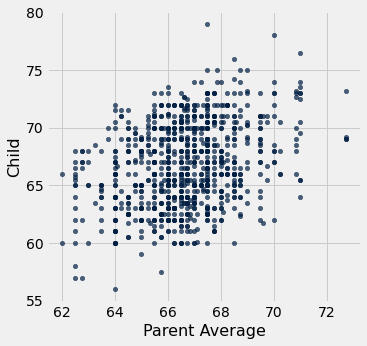

In [14]:
heights.scatter('Parent Average')

Supposons maintenant que les chercheurs rencontrent un nouveau couple, semblable à ceux de cet ensemble de données, et qu'ils se demandent quelle sera la taille de leur enfant. Quelle serait pour lui la meilleure façon de prédire la taille de l'enfant, étant donné que la taille moyenne des parents est, disons, de 68 pouces ?

Une approche raisonnable consisterait à baser la prédiction sur tous les points qui correspondent à une taille moyenne des parents d'environ 60 cm. La prédiction est égale à la taille moyenne de l'enfant calculée à partir de ces seuls points.

Mettons ce plan à exécution. Pour l'instant, nous nous contenterons de définir raisonnablement ce que signifie "environ 60 cm" et de travailler avec cette définition. Plus tard dans le cours, nous examinerons les conséquences de ces choix.

Nous considérerons que "proche" signifie "à un demi-pouce près". La figure ci-dessous montre tous les points correspondant à une taille moyenne des parents comprise entre 67,5 et 68,5 pouces. Il s'agit de tous les points situés dans la bande entre les lignes rouges. Chacun de ces points correspond à un enfant ; notre prédiction de la taille de l'enfant du nouveau couple est la taille moyenne de tous les enfants de la bande. Elle est représentée par le point doré.

Ignorez le code et concentrez-vous sur la compréhension du processus mental qui permet d'arriver à ce point doré.

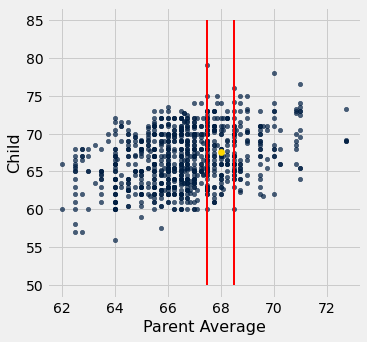

In [15]:
heights.scatter('Parent Average')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 67.62, color='gold', s=40);

Pour calculer exactement l'emplacement du point doré, nous devons d'abord identifier tous les points de la bande. Ceux-ci correspondent aux lignes où la "Moyenne des parents" est comprise entre 67,5 et 68,5 pouces.

In [16]:
close_to_68 = heights.where('Parent Average', are.between(67.5, 68.5))
close_to_68

Parent Average,Child
68,74
68,70
68,68
68,67
68,67
68,66
68,63.5
68,63
67.5,65
68.1,62.7


La taille prédite d'un enfant dont les parents ont une taille moyenne de 68 pouces est la taille moyenne des enfants de ces rangées. C'est 67,62 pouces.

In [17]:
np.average(close_to_68.column('Child'))

67.62

Nous avons maintenant un moyen de prédire la taille d'un enfant à partir de n'importe quelle valeur de la taille moyenne du parent proche de celles de notre ensemble de données. Nous pouvons définir une fonction `predict_child` qui fait cela. Le corps de la fonction est constitué du code des deux cellules ci-dessus, à l'exception du choix des noms.

In [18]:
def predict_child(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child'))                     

Avec une taille moyenne de 68 pouces pour le parent, la fonction `predict_child` renvoie la même prédiction (67,62 pouces) que celle que nous avons obtenue précédemment. L'avantage de définir la fonction est que nous pouvons facilement changer la valeur du prédicteur et obtenir une nouvelle prédiction.

In [19]:
predict_child(68)

67.62

In [20]:
predict_child(66)

66.08640776699029

Quelle est la qualité de ces prévisions ? Nous pouvons en avoir une idée en comparant les prédictions avec les données dont nous disposons déjà. Pour ce faire, nous appliquons d'abord la fonction `predict_child` à la colonne des hauteurs `Parent Average`, et nous rassemblons les résultats dans une nouvelle colonne intitulée `Prediction`.

In [21]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'Parent Average')
)

In [22]:
heights_with_predictions

Parent Average,Child,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


Pour voir où se situent les prédictions par rapport aux données observées, nous pouvons dessiner des diagrammes de dispersion superposés avec la "Moyenne des parents" comme axe horizontal commun.

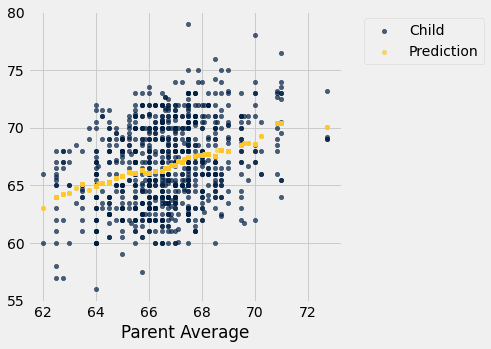

In [23]:
heights_with_predictions.scatter('Parent Average')

Le graphique des points d'or est appelé *graphique des moyennes*, car chaque point d'or est le centre d'une bande verticale comme celle que nous avons dessinée précédemment. Chacun d'entre eux fournit une prédiction de la taille de l'enfant en fonction de la taille moyenne des parents. Par exemple, la dispersion montre que pour une taille moyenne du parent de 65 pouces, la taille prédite de l'enfant serait juste au-dessus de 65 pouces, et en effet `predict_child(65)` évalue à environ 65.84.

In [24]:
predict_child(65)

65.83829787234043

Remarquez que le graphique des moyennes suit approximativement une ligne droite. Cette ligne droite est désormais appelée "ligne de régression" et constitue l'une des méthodes les plus courantes pour faire des prédictions. Le calcul que nous venons de faire est très similaire à celui qui a conduit au développement de la méthode de régression, en utilisant les mêmes données.

Cet exemple, comme celui de l'analyse des décès dus au choléra par John Snow, montre que certains des concepts fondamentaux de la science moderne des données ont des racines très anciennes. La méthode utilisée ici était un précurseur des méthodes de prédiction du *voisin le plus proche*, qui trouvent aujourd'hui de puissantes applications dans divers domaines. Le domaine moderne de l'"apprentissage automatique" comprend l'automatisation de ces méthodes pour faire des prédictions basées sur des ensembles de données vastes et en évolution rapide.

### Regroupement et jonction

In [1]:
from datascience import *
path_data = 'assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

#### Classification par une variable

Les scientifiques des données ont souvent besoin de classer les individus dans des groupes en fonction de caractéristiques communes, puis d'identifier certaines caractéristiques des groupes. Par exemple, dans l'exemple utilisant les données de Galton sur les tailles, nous avons vu qu'il était utile de classer les familles en fonction de la taille moyenne des parents, puis de trouver la taille moyenne des enfants dans chaque groupe.

Cette section traite de la classification des individus dans des catégories qui ne sont pas numériques. Nous commençons par rappeler l'utilisation de base de `group`.

#### Compter le nombre de lignes de chaque catégorie
La méthode `group` avec un seul argument compte le nombre de lignes pour chaque catégorie dans une colonne. Le résultat contient une ligne par valeur unique dans la colonne groupée.

Voici un petit tableau de données sur les cornets de glace. La méthode `group` peut être utilisée pour lister les différents parfums et fournir le nombre de lignes pour chaque parfum.

In [2]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.25)
)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.25


In [3]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


Il y a deux catégories distinctes, chocolat et fraise. L'appel à `group` crée un tableau des effectifs de chaque catégorie. La colonne est appelée `count` par défaut, et contient le nombre de lignes dans chaque catégorie.

Remarquez que tout ceci peut être calculé à partir de la seule colonne `Flavor`. La colonne `Prix` n'a pas été utilisée.

Mais que se passerait-il si nous voulions le prix total des cornets de chaque saveur ? C'est là qu'intervient le second argument de `group`.

#### Recherche d'une caractéristique de chaque catégorie
Le deuxième argument facultatif de `group` nomme la fonction qui sera utilisée pour agréger les valeurs des autres colonnes pour toutes ces lignes. Par exemple, `sum` additionnera les prix de toutes les lignes correspondant à chaque catégorie. Ce résultat contient également une ligne par valeur unique dans la colonne groupée, mais il a le même nombre de colonnes que le tableau original.

Pour trouver le prix total de chaque saveur, nous appelons à nouveau `group`, avec `Flavor` comme premier argument, comme précédemment. Mais cette fois, il y a un second argument : le nom de la fonction `sum`.

In [4]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,16.55
strawberry,8.8


Pour créer ce nouveau tableau, `group` a calculé la somme des entrées `Prix` dans toutes les lignes correspondant à chaque saveur distincte. Les prix des trois lignes "chocolat" s'élèvent à 16,55 $ (vous pouvez supposer que le prix est mesuré en dollars). Les prix des deux lignes "fraises" totalisent 8,80 $.

Le libellé de la colonne "somme" nouvellement créée est "Prix somme", qui est créé en prenant le libellé de la colonne additionnée et en y ajoutant le mot "somme".

Puisque `group` trouve la somme de toutes les colonnes autres que celle contenant les catégories, il n'est pas nécessaire de spécifier qu'il doit `sumer` les prix.

Pour voir plus en détail ce que fait `group`, remarquez que vous auriez pu calculer les prix totaux vous-même, non seulement par calcul mental mais aussi en utilisant du code. Par exemple, pour trouver le prix total de tous les cornets de chocolat, vous pourriez commencer par créer un nouveau tableau composé uniquement des cornets de chocolat, puis accéder à la colonne des prix :

In [5]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 6.55, 5.25])

In [6]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

16.55

C'est ce que fait `group` pour chaque valeur distincte de `Flavor`.

In [7]:
# For each distinct value in `Flavor, access all the rows
# and create an array of `Price`

cones_choc = cones.where('Flavor', are.equal_to('chocolate')).column('Price')
cones_strawb = cones.where('Flavor', are.equal_to('strawberry')).column('Price')

# Display the arrays in a table

grouped_cones = Table().with_columns(
    'Flavor', make_array('chocolate', 'strawberry'),
    'Array of All the Prices', make_array(cones_choc, cones_strawb)
)

# Append a column with the sum of the `Price` values in each array

price_totals = grouped_cones.with_column(
    'Sum of the Array', make_array(sum(cones_choc), sum(cones_strawb))
)
price_totals

Flavor,Array of All the Prices,Sum of the Array
chocolate,[4.75 6.55 5.25],16.55
strawberry,[3.55 5.25],8.8


Vous pouvez remplacer `sum` par n'importe quelle autre fonction qui fonctionne sur les tableaux. Par exemple, vous pouvez utiliser `max` pour trouver le prix le plus élevé dans chaque catégorie :

In [8]:
cones.group('Flavor', max)

Flavor,Price max
chocolate,6.55
strawberry,5.25


Une fois de plus, `group` crée des tableaux de prix dans chaque catégorie `Flavor`. Mais maintenant, il trouve le `max` de chaque tableau :

In [9]:
price_maxes = grouped_cones.with_column(
    'Max of the Array', make_array(max(cones_choc), max(cones_strawb))
)
price_maxes

Flavor,Array of All the Prices,Max of the Array
chocolate,[4.75 6.55 5.25],6.55
strawberry,[3.55 5.25],5.25


En effet, l'appel original à `group` avec un seul argument a le même effet que l'utilisation de `len` comme fonction et le nettoyage de la table.

In [10]:
lengths = grouped_cones.with_column(
    'Length of the Array', make_array(len(cones_choc), len(cones_strawb))
)
lengths

Flavor,Array of All the Prices,Length of the Array
chocolate,[4.75 6.55 5.25],3
strawberry,[3.55 5.25],2


#### Exemple : Salaires de la NBA
Le tableau `nba` contient des données sur les joueurs 2015-2016 de la National Basketball Association. Nous avons examiné ces données précédemment. Rappelons que les salaires sont mesurés en millions de dollars.

In [11]:
nba1 = Table.read_table(path_data + 'nba_salaries.csv')
nba = nba1.relabeled("'15-'16 SALARY", 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


**1.** Quel est le montant des salaires versés par chaque équipe à ses joueurs ?

Les seules colonnes concernées sont `TEAM` et `SALARY`. Nous devons `grouper` les lignes par `TEAM` et ensuite `sum` les salaires des groupes.

In [12]:
teams_and_money = nba.select('TEAM', 'SALARY')
teams_and_money.group('TEAM', sum)

TEAM,SALARY sum
Atlanta Hawks,69.5731
Boston Celtics,50.2855
Brooklyn Nets,57.307
Charlotte Hornets,84.1024
Chicago Bulls,78.8209
Cleveland Cavaliers,102.312
Dallas Mavericks,65.7626
Denver Nuggets,62.4294
Detroit Pistons,42.2118
Golden State Warriors,94.0851


**Combien de joueurs de la NBA ont occupé chacun des cinq postes ?

Nous devons classer par `POSITION`, et compter. Cela peut être fait avec un seul argument de group :

In [13]:
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


**Quel a été le salaire moyen des joueurs à chacun des cinq postes ?

Cette fois-ci, nous devons regrouper par `POSITION` et prendre la moyenne des salaires. Pour plus de clarté, nous travaillerons avec un tableau contenant uniquement les postes et les salaires.

In [14]:
positions_and_money = nba.select('POSITION', 'SALARY')
positions_and_money.group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


Le poste de centre était le mieux rémunéré, avec une moyenne de plus de 6 millions de dollars.

Si nous n'avions pas sélectionné ces deux colonnes lors de notre première étape, `group` n'aurait pas essayé de faire la "moyenne" des colonnes catégorielles de `nba`. (Il est impossible de faire la moyenne de deux chaînes comme "Atlanta Hawks" et "Boston Celtics"). Il n'effectue l'arithmétique que sur les colonnes numériques et laisse le reste vide.

In [15]:
nba.group('POSITION', np.mean)

POSITION,PLAYER mean,TEAM mean,SALARY mean
C,,,6.08291
PF,,,4.95134
PG,,,5.16549
SF,,,5.53267
SG,,,3.9882


In [1]:
from datascience import *
path_data = 'assets/data/'
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

#### Classification croisée par plus d'une variable

Lorsque les individus présentent des caractéristiques multiples, il existe de nombreuses façons de les classer. Par exemple, si nous disposons d'une population d'étudiants pour chacun desquels nous avons enregistré une spécialité et le nombre d'années passées à l'université, les étudiants peuvent être classés par spécialité, par année ou par une combinaison de la spécialité et de l'année.

La méthode du "groupe" nous permet également de classer les individus en fonction de plusieurs variables. C'est ce qu'on appelle le *classement croisé*.

#### Deux variables : Compter le nombre dans chaque catégorie appariée
La table `more_cones` enregistre le parfum, la couleur et le prix de six cornets de glace.

In [2]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


Nous savons comment utiliser `group` pour compter le nombre de cônes de chaque parfum :

In [3]:
more_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


Mais maintenant, chaque cône a aussi une couleur. Pour classer les cônes par saveur et par couleur, nous allons passer une liste d'étiquettes comme argument à `group`. La table résultante a une ligne pour chaque *combinaison unique* de valeurs qui apparaissent ensemble dans les colonnes groupées. Comme précédemment, un seul argument (une liste, dans ce cas, mais un tableau fonctionnerait aussi) donne le nombre de lignes.

Bien qu'il y ait six cornets, il n'y a que quatre combinaisons uniques de saveurs et de couleurs. Deux des cônes étaient au chocolat brun foncé et deux autres à la fraise rose.

In [4]:
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


#### Deux variables : Recherche d'une caractéristique de chaque catégorie appariée
Un deuxième argument permet d'agréger toutes les autres colonnes qui ne figurent pas dans la liste des colonnes groupées.

In [5]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


**Vous pouvez utiliser `group` pour classer les lignes selon trois variables catégorielles ou plus. Il suffit de les inclure toutes dans la liste qui est le premier argument. Mais la classification croisée par plusieurs variables peut devenir complexe, car le nombre de combinaisons distinctes de catégories peut être assez important.

In [1]:
from datascience import *
path_data = 'assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

#### Jointure de tables par colonnes
Il arrive souvent que des données concernant les mêmes personnes soient conservées dans plusieurs tables. Par exemple, un service de l'université peut disposer de données sur le temps écoulé par chaque étudiant jusqu'à l'obtention de son diplôme, tandis qu'un autre dispose de données sur les frais de scolarité et les aides financières accordées à l'étudiant.

Pour comprendre l'expérience des étudiants, il peut être utile de rassembler les deux ensembles de données. Si les données se trouvent dans deux tableaux, chacun comportant une ligne par étudiant, nous devrions rassembler les colonnes, en veillant à faire correspondre les lignes de manière à ce que les informations relatives à chaque étudiant ne figurent que sur une seule ligne.

Nous allons le faire dans le contexte d'un exemple simple, puis nous utiliserons la méthode avec un ensemble de données plus important.

La table `cones` est une table que nous avons déjà rencontrée. Supposons maintenant que chaque parfum de glace soit accompagné d'une note qui se trouve dans une table séparée.

In [2]:
cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'vanilla', 'chocolate', 'strawberry', 'chocolate'),
    'Price', make_array(3.55, 4.75, 6.55, 5.25, 5.75)
)
cones

Flavor,Price
strawberry,3.55
vanilla,4.75
chocolate,6.55
strawberry,5.25
chocolate,5.75


In [3]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


Chacune des tables a une colonne qui contient les parfums de crème glacée : `cones` a la colonne `Flavor`, et `ratings` a la colonne `Kind`. Les entrées de ces colonnes peuvent être utilisées pour relier les deux tables.

La méthode `join` crée une nouvelle table dans laquelle chaque cône de la table `cones` est complété par les informations sur les étoiles de la table `ratings`.  Pour chaque cône de la table `cones`, `join` trouve une ligne dans `ratings` dont le `Kind` correspond à la `Flavor` du cône. Nous devons dire à `join` d'utiliser ces colonnes pour la correspondance.

In [4]:
rated = cones.join('Flavor', ratings, 'Kind')
rated

Flavor,Price,Stars
chocolate,6.55,3.5
chocolate,5.75,3.5
strawberry,3.55,2.5
strawberry,5.25,2.5
vanilla,4.75,4


Chaque cône comporte désormais non seulement son prix, mais aussi l'évaluation de sa saveur.

En général, un appel à `join` qui ajoute à une table (disons `table1`) des informations provenant d'une autre table (disons `table2`) ressemble à ceci :

    table1.join(table1_column_for_joining, table2, table2_column_for_joining)

La nouvelle table `rated` nous permet de calculer le prix par étoile, que l'on peut considérer comme une mesure informelle de la valeur. Les valeurs basses sont bonnes - elles signifient que vous payez moins pour chaque étoile d'évaluation.

In [5]:
rated.with_column('$/Star', rated.column('Price') / rated.column('Stars')).sort(3)

Flavor,Price,Stars,$/Star
vanilla,4.75,4,1.1875
strawberry,3.55,2.5,1.42
chocolate,5.75,3.5,1.64286
chocolate,6.55,3.5,1.87143
strawberry,5.25,2.5,2.1


Bien que la fraise soit la moins bien notée des trois parfums, le cône à la fraise, moins cher, s'en sort bien car il ne coûte pas cher par étoile.

**L'ordre dans lequel nous énumérons les deux tableaux a-t-il une importance ? Essayons.  Comme vous le voyez, cela modifie l'ordre d'apparition des colonnes et peut éventuellement modifier l'ordre des lignes, mais cela ne fait pas de différence fondamentale.

In [6]:
ratings.join('Kind', cones, 'Flavor')

Kind,Stars,Price
chocolate,3.5,6.55
chocolate,3.5,5.75
strawberry,2.5,3.55
strawberry,2.5,5.25
vanilla,4,4.75


Notez également que la jointure ne contiendra que des informations sur les éléments figurant dans les deux tables. Voyons un exemple. Supposons qu'il existe un tableau de commentaires sur certains cornets de crème glacée et que nous ayons trouvé le commentaire moyen pour chaque parfum.

In [7]:
reviews = Table().with_columns(
    'Flavor', make_array('vanilla', 'chocolate', 'vanilla', 'chocolate'),
    'Stars', make_array(5, 3, 5, 4)
)
reviews

Flavor,Stars
vanilla,5
chocolate,3
vanilla,5
chocolate,4


In [8]:
average_review = reviews.group('Flavor', np.average)
average_review

Flavor,Stars average
chocolate,3.5
vanilla,5


Nous pouvons joindre `cones` et `average_review` en fournissant les libellés des colonnes à joindre.

In [9]:
cones.join('Flavor', average_review, 'Flavor')

Flavor,Price,Stars average
chocolate,6.55,3.5
chocolate,5.75,3.5
vanilla,4.75,5


Remarquez que les cônes de fraises ont disparu. Aucun des avis ne concerne des cornets de fraises, et il n'y a donc rien à quoi les lignes `strawberry` peuvent être reliées. Cela peut être un problème ou non - cela dépend de l'analyse que nous essayons d'effectuer avec la table jointe.

- Visualisation des données : regarder les données "de la bonne manière" couvrant 1.7 (30min)

    - Introduction aux visualisations à l'aide de Seaborn (et conceptuellement)
    - avoir des exemples clairs de la bonne façon de regarder les données et des relations non triviales visibles seulement sur "le bon graphique"
    - par exemple, les relations entre les distances à différentes échelles ? quelque chose inspiré des graphiques de Nika
	- prendre soin de présenter en détail l'histogramme, le principe de l'aire et la différence avec le diagramme à barres


TODO : en plus du point 7 ci-dessous, ajouter un exemple de visualisation de motifs non triviaux de la "bonne façon".

## 3. Visualisation des données

La troisième partie continue à mettre en œuvre les notions vues dans la deuxième partie et se concentre sur la représentation graphique des données à l'aide de la librairie seaborn de python (bar plots, histograms, scatter plots et line plots)

In [1]:
from datascience import *
import matplotlib
path_data = 'assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

Les tableaux sont un moyen efficace d'organiser et de visualiser les données. Cependant, les grands tableaux de chiffres peuvent être difficiles à interpréter, quelle que soit leur organisation. Il est parfois plus facile d'interpréter des graphiques que des chiffres.

Dans ce chapitre, nous développerons certaines des méthodes graphiques fondamentales d'analyse des données. Notre source de données est l'[Internet Movie Database] (http://www.imdb.com), une base de données en ligne qui contient des informations sur les films, les émissions de télévision, les jeux vidéo, etc. Le site [Box Office Mojo](http://www.boxofficemojo.com) fournit de nombreux résumés des données de l'IMDB, dont certains ont été adaptés par nos soins. Nous avons également utilisé les résumés de données de [The Numbers](http://www.the-numbers.com), un site dont le slogan est "where data and the movie business meet" (où les données et le cinéma se rencontrent).

### Diagrammes de dispersion et graphiques linéaires

#### Exemple de données

La table `actors` contient des données sur les acteurs d'Hollywood, hommes et femmes. Les colonnes sont les suivantes :

| Colonne | Contenu |
|---------------------|----------|
|Acteur` | Nom de l'acteur | Nom de l'acteur
| Total Gross` | Total des recettes brutes au box-office national, en millions de dollars, de tous les films de l'acteur | `Nombre de films` | Nombre de films dans lesquels l'acteur a joué
| `Nombre de films` | Nombre de films dans lesquels l'acteur a joué |
| Moyenne par film" - Brut total divisé par le nombre de films.
| `Film n°1` - Le film qui a rapporté le plus d'argent et dans lequel l'acteur a joué.
| `Gross` | Recettes brutes au box-office national, en millions de dollars, du `Film n°1` de l'acteur.

Dans le calcul des recettes brutes, les tabulateurs de données n'ont pas inclus les films dans lesquels l'acteur avait un rôle de caméos ou un rôle parlant qui n'impliquait pas beaucoup de temps à l'écran.

Le tableau comporte 50 lignes, correspondant aux 50 acteurs ayant réalisé le plus de recettes brutes. Le tableau est déjà trié par "Total brut", il est donc facile de voir que Harrison Ford est l'acteur qui a réalisé le plus de recettes. Au moment où le tableau a été créé, ses films avaient rapporté plus d'argent au box-office national que les films de tous les autres acteurs du tableau.

In [2]:
actors = Table.read_table(path_data + 'actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


**Terminologie.**
Une *variable* est un nom formel pour ce que nous appelons une "caractéristique" ou un "attribut", tel que "nombre de films". Le terme "variable" met l'accent sur le fait qu'une caractéristique peut avoir des valeurs différentes selon les individus. Par exemple, le nombre de films dans lesquels les acteurs ont joué varie d'un acteur à l'autre.

Les variables qui ont des valeurs numériques et peuvent être mesurées numériquement, comme le "nombre de films" ou les "recettes brutes moyennes par film", sont appelées variables *quantitatives* ou *numériques*.

#### Diagrammes de dispersion

Un *diagramme de dispersion* montre la relation entre deux variables numériques. Vous avez vu un exemple de diagramme de dispersion dans une section précédente où nous avons étudié le nombre de périodes et le nombre de personnages dans deux romans classiques.

La méthode de tableau `scatter` dessine un diagramme de dispersion composé d'un point pour chaque ligne du tableau. Son premier argument est l'étiquette de la colonne à tracer sur l'axe horizontal, et son deuxième argument est l'étiquette de la colonne sur l'axe vertical.

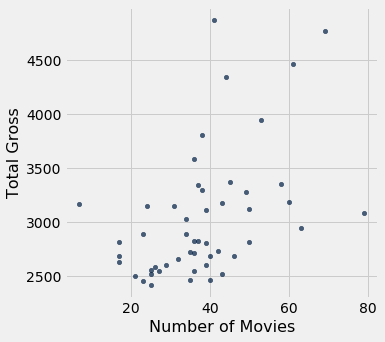

In [3]:
actors.scatter('Number of Movies', 'Total Gross')

Le graphique contient 50 points, un point pour chaque acteur du tableau. Vous pouvez constater que la pente est généralement ascendante. Plus un acteur a joué dans un grand nombre de films, plus le total des recettes brutes de tous ces films est élevé - en général.

Formellement, nous disons que le graphique montre une *association* entre les variables, et que l'association est *positive* : les valeurs élevées d'une variable tendent à être associées à des valeurs élevées de l'autre, et les valeurs faibles de l'une à des valeurs faibles de l'autre, en général.

Bien entendu, il existe une certaine variabilité. Certains acteurs ont un nombre élevé de films mais des recettes brutes totales moyennes. D'autres ont un nombre de films moyen mais des recettes élevées. Le fait que l'association soit positive est simplement une déclaration sur la tendance générale.

Plus tard dans le cours, nous étudierons comment quantifier l'association. Pour l'instant, nous nous contenterons d'y réfléchir qualitativement.

Maintenant que nous avons étudié la relation entre le nombre de films et les recettes brutes *totales*, intéressons-nous à la relation entre le nombre de films et les recettes brutes *moyennes* par film.

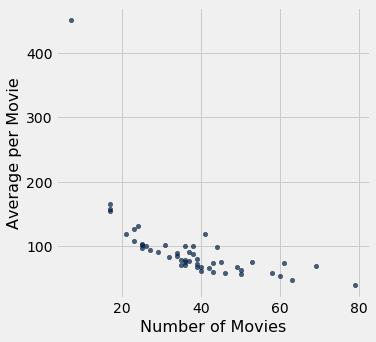

In [4]:
actors.scatter('Number of Movies', 'Average per Movie')

L'image est nettement différente et montre une association *négative*. En général, plus un acteur a joué dans un grand nombre de films, moins la moyenne des recettes par film est élevée.

En outre, l'un des points est très élevé et se situe à gauche du graphique. Il correspond à un acteur qui a un faible nombre de films et une moyenne élevée par film. Ce point est une "valeur aberrante". Il se situe en dehors de la fourchette générale des données. En effet, il est très éloigné de tous les autres points du graphique.

Nous examinerons plus en détail l'association négative en étudiant les points situés aux extrémités droite et gauche du graphique.

Pour l'extrémité droite, zoomons sur le corps principal du graphique en examinant uniquement la partie qui n'a pas de valeur aberrante.

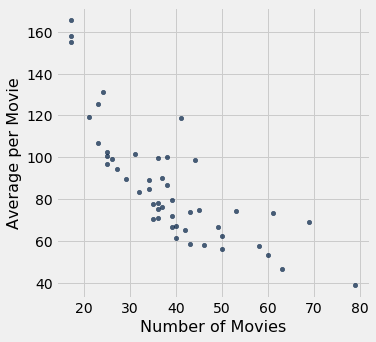

In [5]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

L'association négative est toujours clairement visible. Identifions les acteurs correspondant aux points situés à droite du graphique où le nombre de films est important :

In [6]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


Le grand acteur Robert DeNiro a le plus grand nombre de films et la plus faible moyenne de recettes par film. D'autres grands acteurs se situent à des points qui ne sont pas très éloignés, mais celui de DeNiro est à l'extrémité.

Pour comprendre l'association négative, il faut noter que plus un acteur joue dans un grand nombre de films, plus ces films peuvent être variables, en termes de style, de genre et de recettes. Par exemple, un acteur peut jouer dans des films d'action ou des comédies à gros budget (comme Meet the Fockers), mais aussi dans un grand nombre de films plus modestes qui peuvent être excellents mais qui n'attirent pas les foules. La valeur des recettes moyennes par film de l'acteur peut donc être relativement faible.

Pour aborder cet argument sous un angle différent, examinons maintenant la valeur aberrante.

In [7]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


En tant qu'acteur, Anthony Daniels n'a peut-être pas la stature de Robert DeNiro. Mais ses 7 films ont généré une recette moyenne étonnamment élevée de près de 452 millions de dollars par film.

Quels étaient ces films ? Vous connaissez peut-être le droïde C-3PO dans La Guerre des étoiles :

![C-3PO](images/C-3PO_droid.png)

C'est [Anthony Daniels](https://en.wikipedia.org/wiki/Anthony_Daniels) dans le costume métallique. Il joue le rôle de C-3PO.

Toute la filmographie de M. Daniels (à l'exception des caméos) est constituée de films de la franchise Star Wars, qui génère d'importantes recettes. Cela explique à la fois sa moyenne de recettes élevée et son faible nombre de films.

Des variables telles que le genre et le budget de production ont un effet sur l'association entre le nombre de films et les recettes moyennes par film. Cet exemple nous rappelle que l'étude de l'association entre deux variables implique souvent la compréhension d'autres variables connexes.

#### Tracés de lignes

Les tracés linéaires, parfois connus sous le nom de graphiques linéaires, font partie des visualisations les plus courantes. Ils sont souvent utilisés pour étudier les tendances et les modèles chronologiques.

Le tableau `movies_by_year` contient des données sur les films produits par les studios américains pour chacune des années 1980 à 2015. Les colonnes sont les suivantes :

| Colonne **Colonne** | Contenu **Colonne **Colonne **Colonne **Collectif
|------------|---------|
| `Year` | Année | `Total Gross` | Année
| `Total Gross` | Total des recettes du box-office national, en millions de dollars, pour tous les films sortis en salles.
| `Nombre de films` | Nombre de films sortis en salle
| ``Premier film`` - Film ayant réalisé la plus grosse recette | ``Premier film`` - Film ayant réalisé la plus grosse recette

In [8]:
movies_by_year = Table.read_table(path_data + 'movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


La méthode `plot` de Table produit un graphique linéaire. Ses deux arguments sont les mêmes que ceux de `scatter` : d'abord la colonne sur l'axe horizontal, puis la colonne sur l'axe vertical. Voici un graphique linéaire du nombre de films sortis chaque année entre 1980 et 2015.

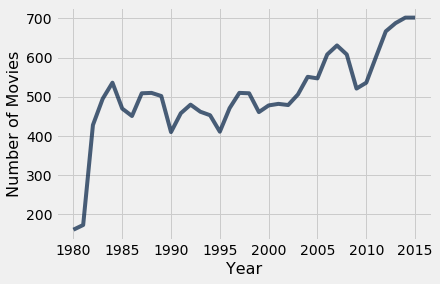

In [9]:
movies_by_year.plot('Year', 'Number of Movies')

Le graphique augmente brusquement, puis suit une légère tendance à la hausse, bien que les chiffres varient sensiblement d'une année à l'autre. La forte hausse du début des années 1980 est due en partie au fait que les studios sont revenus au premier plan de la production cinématographique après quelques années de films réalisés par des cinéastes dans les années 1970.

Nous nous concentrerons sur les années les plus récentes. En accord avec le thème des films, le tableau des lignes correspondant aux années 2000 à 2015 a été nommé `century_21`.

In [10]:
century_21 = movies_by_year.where('Year', are.above(1999))

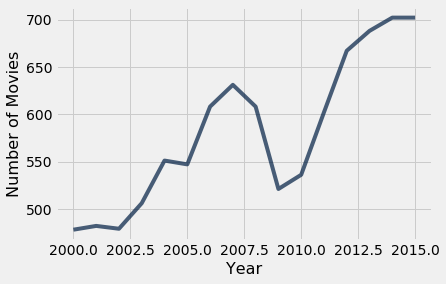

In [11]:
century_21.plot('Year', 'Number of Movies')

La crise financière mondiale de 2008 a un effet visible : en 2009, le nombre de films sortis est en forte baisse.

Les chiffres en dollars, cependant, n'ont pas beaucoup souffert.

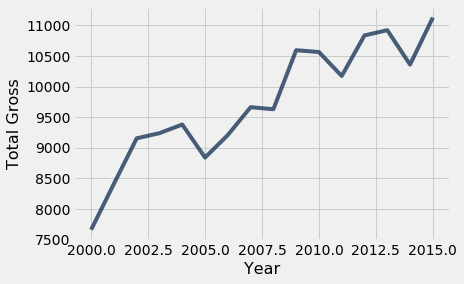

In [12]:
century_21.plot('Year', 'Total Gross')

Le total des recettes brutes nationales a été plus élevé en 2009 qu'en 2008, malgré la crise financière et un nombre beaucoup plus faible de films sortis.

Cette contradiction apparente s'explique notamment par le fait que les gens ont tendance à aller au cinéma en période de récession. ["In Downturn, Americans Flock to the Movies,"] (http://www.nytimes.com/2009/03/01/movies/01films.html?_r=0) a déclaré le New York Times en février 2009. L'article cite Martin Kaplan, de l'université de Californie du Sud, qui déclare : "Les gens veulent oublier leurs problèmes et se retrouver avec d'autres personnes." Lorsque les vacances et les plaisirs coûteux sont inabordables, le cinéma offre un divertissement et un soulagement bienvenus.

En 2009, le film Avatar et sa sortie en 3D ont également été à l'origine des recettes élevées du box-office. Non seulement Avatar a été le premier film de l'année 2009, mais il est aussi, selon certains calculs, l'un des films qui a rapporté le plus d'argent de tous les temps, comme nous le verrons plus loin.

In [13]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


In [1]:
from datascience import *
import matplotlib
path_data = 'assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

### Visualisation des distributions catégorielles

#### Exemple de données
Les données se présentent sous de nombreuses formes qui ne sont pas numériques. Les données peuvent être des morceaux de musique ou des lieux sur une carte. Elles peuvent également être des catégories dans lesquelles vous pouvez placer des individus. Voici quelques exemples de variables *catégorielles*.

- Les individus sont des cartons de crème glacée, et la variable est le parfum du carton.
- Les individus sont des joueurs de basket-ball professionnels, et la variable est l'équipe du joueur.
- Les individus sont des années, et la variable est le genre du film le plus rentable de l'année.
- Les individus sont des répondants à une enquête, et la variable est la réponse qu'ils choisissent parmi "Pas du tout satisfait", "Assez satisfait" et "Très satisfait".

La table `icecream` contient des données sur 30 cartons de glace.

In [12]:
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


Les *valeurs* de la variable catégorielle "saveur" sont chocolat, fraise et vanille.

Chacun des cartons contenait exactement l'un des trois parfums. Dans une *distribution*, chaque individu appartient à exactement une catégorie et a donc exactement une valeur. Nous avons donc une distribution de saveurs.

Le tableau indique le nombre de cartons de chaque parfum. Nous appelons cela un *tableau de distribution*. Un tableau de distribution présente toutes les valeurs de la variable ainsi que la fréquence de chacune d'entre elles.

#### Diagramme à barres
Le diagramme à barres est un moyen familier de visualiser des distributions catégorielles. Il affiche une barre pour chaque catégorie. Les barres sont également espacées et également larges. La longueur de chaque barre est proportionnelle à la fréquence de la catégorie correspondante.

Nous dessinerons des diagrammes à barres avec des barres horizontales car il est plus facile d'étiqueter les barres de cette façon. La méthode Table s'appelle donc `barh`. Elle prend deux arguments : le premier est l'étiquette de la colonne des catégories, et le second est l'étiquette de la colonne des fréquences.

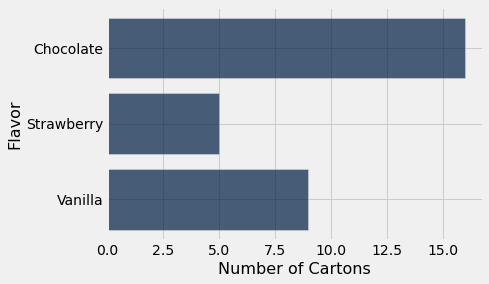

In [13]:
icecream.barh('Flavor', 'Number of Cartons')

Si le tableau ne comporte qu'une colonne de catégories et une colonne de fréquences, comme dans `icecream`, l'appel à la méthode est encore plus simple. Vous pouvez simplement spécifier la colonne contenant les catégories, et `barh` utilisera les valeurs de l'autre colonne comme fréquences.

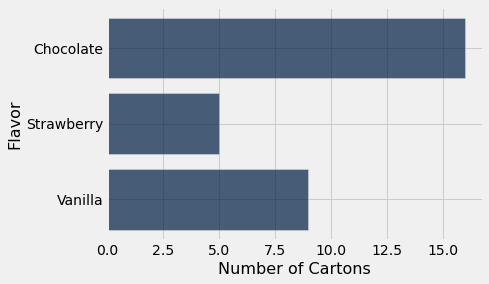

In [14]:
icecream.barh('Flavor')

#### Aspects de la conception des diagrammes à barres
Outre les différences purement visuelles, il existe une distinction fondamentale importante entre les diagrammes en bâtons et les deux graphiques que nous avons vus dans les sections précédentes. Il s'agit du diagramme de dispersion et du diagramme linéaire, qui présentent tous deux deux variables quantitatives - les variables sur les deux axes sont quantitatives. En revanche, le diagramme en bâtons présente des catégories sur un axe et des quantités numériques sur l'autre.

Cela a des conséquences pour le graphique. Tout d'abord, la largeur de chaque barre et l'espace entre les barres consécutives dépendent entièrement de la personne qui produit le graphique ou du programme utilisé pour le produire. Python a fait ces choix pour nous. Si vous deviez dessiner le graphique à la main, vous pourriez faire des choix complètement différents et obtenir un graphique parfaitement correct, à condition de dessiner toutes les barres avec la même largeur et de garder tous les espaces identiques.

Plus important encore, les barres peuvent être dessinées dans n'importe quel ordre. Les catégories "chocolat", "vanille" et "fraise" n'ont pas d'ordre universel, contrairement, par exemple, aux nombres 5, 7 et 10.

Cela signifie que nous pouvons dessiner un diagramme à barres plus facile à interpréter en réarrangeant les barres dans l'ordre décroissant. Pour ce faire, nous réarrangeons d'abord les lignes de `icecream` dans l'ordre décroissant du `Nombre de cartons`, puis nous traçons le diagramme en barres.

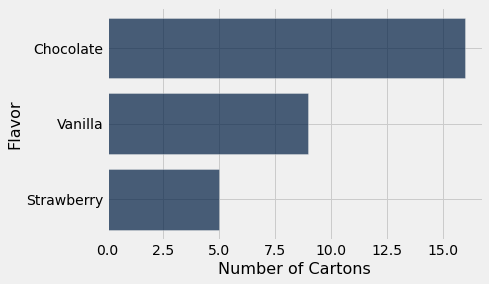

In [15]:
icecream.sort('Number of Cartons', descending=True).barh('Flavor')

Ce diagramme à barres contient exactement les mêmes informations que les précédents, mais il est un peu plus facile à lire. Si ce gain n'est pas énorme par rapport à la lecture d'un diagramme à trois barres, il peut être très important lorsque le nombre de catégories est élevé.

#### Regroupement de données catégorielles
Pour construire le tableau `icecream`, quelqu'un a dû regarder les 30 cartons de crème glacée et compter le nombre de chaque parfum. Mais si notre tableau n'inclut pas déjà des fréquences, nous devons calculer les fréquences avant de pouvoir dessiner un diagramme à barres. Voici un exemple où cela est nécessaire.

Le tableau `top` contient les films américains qui ont rapporté le plus d'argent de tous les temps, en 2017. La première colonne contient le titre du film ; *Star Wars : The Force Awakens* occupe la première place, avec un montant brut au box-office de plus de 900 millions de dollars aux États-Unis. La deuxième colonne contient le nom du studio qui a produit le film. La troisième colonne contient le montant brut du box-office national en dollars, et la quatrième colonne contient le montant brut qui aurait été généré par la vente des billets aux prix de 2016. La cinquième colonne contient l'année de sortie du film.

La liste compte 200 films. Voici les dix premiers selon les recettes brutes non ajustées.

In [3]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
top

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


Les studios MGM, Fox, Universal et Paramount apparaissent plus d'une fois dans les dix premiers. Quels studios apparaîtront le plus souvent si nous examinons les 200 lignes ?

Pour répondre à cette question, il suffit de disposer d'un tableau contenant les films et les studios ; les autres informations ne sont pas nécessaires.

In [4]:
movies_and_studios = top.select('Title', 'Studio')

La méthode de tableau `group` nous permet de compter la fréquence d'apparition de chaque studio dans le tableau, en appelant chaque studio une catégorie et en rassemblant toutes les lignes dans chacune de ces nouvelles catégories.

La méthode `group` prend comme argument l'étiquette de la colonne qui contient les catégories. Elle renvoie un tableau des nombres de lignes dans chaque catégorie.

Ainsi, `group` crée un tableau de distribution qui montre comment les individus (films) sont répartis entre les catégories (studios).

La méthode `group` liste les catégories par ordre croissant. Comme nos catégories sont des noms de studios et qu'elles sont donc représentées par des chaînes de caractères, l'ordre croissant signifie l'ordre alphabétique.

La colonne des comptes est toujours appelée `count`, mais vous pouvez changer cela si vous le souhaitez en utilisant `relabeled`.

In [11]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


Le tableau indique qu'il existe 23 studios différents et fournit le nombre de films sortis par chacun d'entre eux. Le total est de 200, soit le nombre total de films.

In [12]:
sum(studio_distribution.column('count'))

200

Nous pouvons maintenant utiliser ce tableau, ainsi que les compétences graphiques acquises ci-dessus, pour dessiner un diagramme à barres qui montre quels studios sont les plus fréquents parmi les 200 films ayant rapporté le plus d'argent.

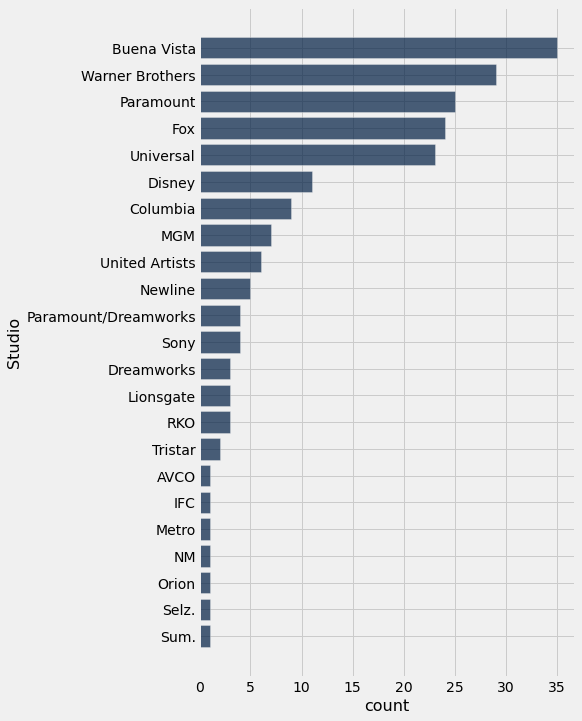

In [13]:
studio_distribution.sort('count', descending=True).barh('Studio')

Buena Vista et Warner Brothers sont les studios les plus répandus parmi les 200 premiers films. Warner Brothers produit les films Harry Potter et Buena Vista produit Star Wars.

#### Vers des variables quantitatives

Bien que les années soient numériques, nous pourrions traiter l'année de sortie comme une variable catégorielle et tracer sa distribution. En d'autres termes, pour chaque année, nous pourrions déterminer le nombre de films sortis cette année-là, puis tracer le diagramme à barres de cette distribution.

C'est ce que nous allons faire, en nous limitant aux 10 premières années de la distribution.

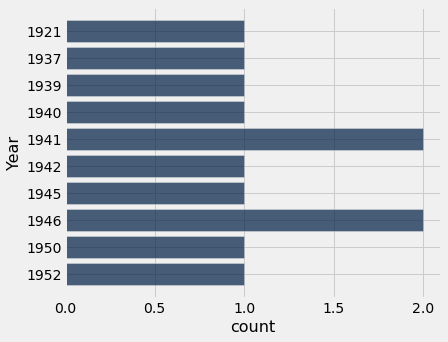

In [8]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').take(np.arange(10)).barh('Year')

Les années apparaissent en ordre croissant car `group` trie les catégories de la plus basse à la plus haute. C'est important ici car les années ont un ordre chronologique qui doit être maintenu. Mais il y a quelque chose d'inquiétant dans ce diagramme à barres. Les barres de 1921 et 1937 sont aussi éloignées les unes des autres que les barres de 1937 et 1939. Le diagramme ne montre pas qu'aucun des 200 films n'est sorti entre 1922 et 1936, ni en 1938. Ces incohérences et omissions rendent la distribution des premières années difficile à comprendre sur la base de cette visualisation.

La distribution d'une variable catégorielle peut être représentée à l'aide d'un diagramme en barres. Mais si la variable n'est pas catégorique mais quantitative, les relations numériques entre ses valeurs doivent être prises en compte lorsque nous créons des visualisations. C'est le sujet de la section suivante.

In [1]:
from datascience import *
import numpy as np
path_data = 'assets/data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Visualisation des distributions numériques

De nombreuses variables étudiées par les scientifiques des données sont *quantitatives* ou *numériques*. Leurs valeurs sont des nombres sur lesquels vous pouvez effectuer des opérations arithmétiques. Parmi les exemples que nous avons vus, citons le nombre de périodes dans les chapitres d'un livre, le montant de l'argent gagné par les films et l'âge des personnes aux États-Unis.

Les valeurs d'une variable catégorielle peuvent recevoir des codes numériques, mais cela ne rend pas la variable quantitative. Dans l'exemple où nous avons étudié les données du recensement ventilées par groupe d'âge, la variable catégorielle `SEX` avait les codes numériques `1` pour 'Homme', `2` pour 'Femme', et `0` pour l'agrégat des deux groupes `1` et `2`. Bien que 0, 1 et 2 soient des nombres, dans ce contexte, cela n'a pas de sens de soustraire 1 de 2, ou de prendre la moyenne de 0, 1 et 2, ou d'effectuer d'autres opérations arithmétiques sur les trois valeurs. `SEX` est une variable catégorielle même si les valeurs ont reçu un code numérique.

#### Exemple de données

Pour notre exemple principal, nous allons revenir à un ensemble de données que nous avons étudié lorsque nous visualisions des données catégorielles. Il s'agit du tableau `top`, qui contient des données sur les films américains les plus vendus de tous les temps (en 2017). Pour plus de commodité, voici à nouveau la description du tableau.

La première colonne contient le titre du film. La deuxième colonne contient le nom du studio qui a produit le film. La troisième colonne contient le montant brut du box-office national en dollars, et la quatrième colonne contient le montant brut qui aurait été généré par la vente des billets aux prix de 2016. La cinquième colonne contient l'année de sortie du film.

La liste compte 200 films. Voici les dix premiers selon les recettes brutes non ajustées dans la colonne "Brut".

In [2]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
Star Wars,Fox,"460,998,007","1,583,483,200",1977
The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
Titanic,Paramount,"658,672,302","1,204,368,000",1997
The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
Jaws,Universal,"260,000,000","1,138,620,700",1975
Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


Dans cette section, nous allons dessiner des graphiques de la distribution de la variable numérique dans la colonne "Brut (ajusté)". Par souci de simplicité, nous allons créer un tableau plus petit contenant les informations dont nous avons besoin. Et comme il est plus facile de travailler avec des nombres à trois chiffres qu'avec des nombres à neuf chiffres, mesurons les recettes "brutes ajustées" en millions de dollars. Notez que `np.round` est utilisé pour ne conserver que deux décimales dans chaque entrée de la colonne.

In [3]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Gone with the Wind,1796.18
Star Wars,1583.48
The Sound of Music,1266.07
E.T.: The Extra-Terrestrial,1261.08
Titanic,1204.37
The Ten Commandments,1164.59
Jaws,1138.62
Doctor Zhivago,1103.56
The Exorcist,983.23
Snow White and the Seven Dwarves,969.01


#### Regroupement des données
Examinez les valeurs de la variable quantitative "brut ajusté". Il est probable qu'il n'y ait qu'un seul film pour chaque valeur individuelle, puisque les valeurs sont mesurées assez finement. Il est plus intéressant de regrouper les valeurs en intervalles, appelés *bins*, et de voir combien de films se trouvent dans chaque bin. Ce processus est appelé *binning*.

Le nombre d'individus (c'est-à-dire de lignes) dans les bacs peut être calculé à l'aide de la méthode `bin`, analogue à la méthode `group` utilisée dans le cas de données catégorielles. La méthode `bin` prend comme argument un libellé de colonne ou un index, et un argument optionnel dans lequel vous pouvez spécifier les bacs que vous voulez.

Le résultat est un tableau à deux colonnes qui contient le nombre de lignes dans chaque cellule. La première colonne énumère les extrémités gauches des cases (mais voir la note concernant la dernière case, ci-dessous).

Essayons la méthode et examinons les détails de la sortie. Pour choisir les cellules, nous commencerons par regarder les valeurs les plus petites et les plus grandes de `Brut Ajusté`.

In [4]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(338.41, 1796.18)

Essayons des bacs de 100 de large, commençant à 300 et allant jusqu'à 2000. Vous pouvez faire d'autres choix. Il est courant de commencer par quelque chose qui semble raisonnable et d'ajuster ensuite en fonction des résultats.

In [5]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

bin,Adjusted Gross count
300,68
400,60
500,32
600,15
700,7
800,7
900,3
1000,0
1100,3
1200,3


Examinons la colonne 0, la colonne `bin`. Cette colonne indique l'extrémité gauche de chaque case, sauf dans la dernière ligne, comme expliqué ci-dessous.

Comme les cases divisent la droite numérique en intervalles, elles sont contiguës. Nous devons donc faire attention aux valeurs aux extrémités. Selon la convention Python habituelle, chaque case, à l'exception de la dernière, inclut son extrémité gauche, mais pas son extrémité droite.

Pour clarifier ce point, nous utiliserons la notation [*a, b*) pour faire référence à la case qui contient toutes les valeurs supérieures ou égales à *a* et strictement inférieures à *b*.

Pour comprendre la première ligne du tableau, il faut également examiner la deuxième ligne. Ces deux lignes nous indiquent qu'il y avait 68 films dans l'intervalle [300, 400]. C'est-à-dire que 68 films ont eu des recettes brutes ajustées d'au moins 300 millions de dollars mais inférieures à 400 millions de dollars.

En général, chaque élément de la colonne `Adjusted Gross count` compte toutes les valeurs `Adjusted Gross` qui sont supérieures ou égales à la valeur dans `bin`, mais inférieures à la valeur suivante dans `bin`.

**Remarquez la valeur `bin` 2000 dans la dernière ligne. Ce n'est pas l'extrémité gauche d'une case. Il s'agit plutôt de l'extrémité droite de la dernière case. Ce bac est différent de tous les autres car il a la forme [a, b]. Il inclut les données aux *deux* extrémités. Dans notre exemple, cela n'a pas d'importance car aucun film n'a rapporté 2 milliards de dollars (c'est-à-dire 2000 millions). Mais il est important de garder à l'esprit cet aspect du binning au cas où l'on voudrait que les bin se terminent exactement à la valeur maximale des données. Tous les effectifs de ce dernier bac apparaissent dans l'avant-dernière ligne, et l'effectif de la dernière ligne est toujours égal à zéro.

Il existe d'autres façons d'utiliser la méthode `bin`. Si vous ne spécifiez aucun bac, la valeur par défaut est de produire 10 bacs de même largeur entre les valeurs minimum et maximum des données. Cette méthode est souvent utile pour obtenir rapidement une idée de la distribution, mais les extrémités des bacs ont tendance à être alarmantes.

In [6]:
millions.bin('Adjusted Gross').show()

bin,Adjusted Gross count
338.41,115
484.187,50
629.964,14
775.741,10
921.518,3
1067.3,4
1213.07,2
1358.85,0
1504.63,1
1650.4,1


Vous pouvez spécifier un nombre d'intervalles de même largeur. Par exemple, l'option `bins=4` permet d'obtenir 4 bacs de même largeur.

In [7]:
millions.bin('Adjusted Gross', bins=4)

bin,Adjusted Gross count
338.41,177
702.852,15
1067.3,6
1431.74,2
1796.18,0


Mais avec des données quantitatives, les cases ne doivent pas nécessairement avoir la même largeur. Nous verrons plus loin un exemple de bacs inégaux.

#### Histogramme
Un *histogramme* est une visualisation de la distribution d'une variable quantitative. Il ressemble beaucoup à un diagramme à barres, mais il y a quelques différences importantes que nous examinerons dans cette section. Tout d'abord, dessinons un histogramme des recettes ajustées.

La méthode `hist` génère un histogramme des valeurs d'une colonne. L'argument optionnel `unit` est utilisé dans les étiquettes des deux axes. L'histogramme ci-dessous montre la distribution des montants bruts ajustés, en millions de dollars de 2016. Nous n'avons pas spécifié les cases, donc `hist` crée 10 cases de largeur égale entre les valeurs minimales et maximales des données.

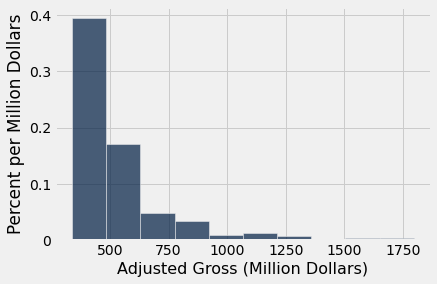

In [8]:
millions.hist('Adjusted Gross', unit="Million Dollars")

Cette figure comporte deux axes numériques. Nous allons d'abord jeter un coup d'œil rapide à l'axe horizontal, puis examiner attentivement l'axe vertical. Pour l'instant, il suffit de noter que **l'axe vertical ne représente pas les pourcentages**.

#### L'axe horizontal

Bien que dans cet ensemble de données aucun film n'ait rapporté un montant qui se situe exactement à la limite entre deux bacs, `hist` doit prendre en compte les situations où il peut y avoir des valeurs à la limite. C'est pourquoi `hist` utilise la même *convention de point final* que la méthode `bin`. Les bacs incluent les données à leur extrémité gauche, mais pas les données à leur extrémité droite, à l'exception du bac le plus à droite qui inclut les deux extrémités.

Nous pouvons voir qu'il y a 10 bacs (certaines barres sont si basses qu'elles sont difficiles à voir), et qu'ils ont tous la même largeur. Nous pouvons également constater qu'aucun des films n'a rapporté moins de 300 millions de dollars, car nous ne prenons en compte que les films ayant rapporté le plus d'argent.

Il est un peu plus difficile de voir exactement où se situent les extrémités des bacs. Il est donc difficile de déterminer exactement où se termine une barre et où commence la suivante.

L'argument optionnel `bins` peut être utilisé avec `hist` pour spécifier les points d'extrémité des bacs exactement comme avec la méthode `bin`. Nous commencerons par fixer les nombres dans `bins` à 300, 400, 500, et ainsi de suite, en terminant par 2000.  

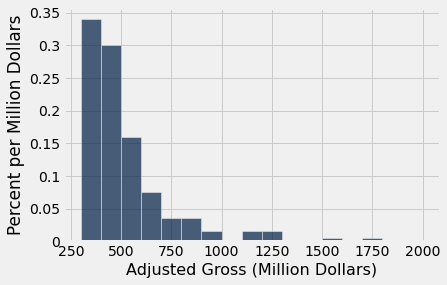

In [9]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

L'axe horizontal de cette figure est plus facile à lire. Par exemple, vous pouvez voir exactement où se trouve 600, même s'il n'est pas étiqueté.

Un très petit nombre de films ont rapporté un milliard de dollars (1000 millions) ou plus. Il en résulte que la figure est "inclinée vers la droite" ou, de façon moins formelle, qu'elle a "une longue queue droite". Les distributions de variables telles que le revenu ou le loyer dans de grandes populations ont souvent ce type de forme.

#### Le principe de l'aire ##
Les deux axes d'un histogramme sont numériques, vous pouvez donc effectuer des opérations arithmétiques sur les deux axes. Par exemple, vous pouvez multiplier les valeurs de l'un ou des deux axes par un facteur. Pour voir comment cela peut affecter la perception visuelle, prenons du recul par rapport aux histogrammes et examinons un graphique fourni à cet effet par le site [Flowing Data] (https://flowingdata.com/2012/03/16/new-ipad-battery-size-is-huge/). Il s'agit d'une comparaison entre la taille des batteries de deux modèles d'iPad.

![Batteries iPad](images/ipad_battery.png)

La plus grande des batteries est censée être 70% plus grande que la plus petite. Elle est donc censée être plus grande, mais pas tout à fait deux fois plus grande. Cependant, la plus grande batterie sur la photo semble presque quatre fois plus grande que la plus petite.

Ce problème s'explique par le fait que l'œil considère la "surface" comme la mesure de la taille, et pas seulement la hauteur ou la largeur. Sur l'image, les deux dimensions ont été augmentées de 70 %, ce qui entraîne un effet multiplicatif de la surface.

Selon le principe de visualisation de la surface, lorsque nous représentons une grandeur par une figure à deux dimensions, telle qu'un rectangle, c'est la surface de la figure qui doit représenter la grandeur.

#### L'histogramme : Principes généraux et calcul

Les histogrammes suivent le principe de l'aire et ont deux propriétés déterminantes :

1. Les cases sont dessinées à l'échelle et sont contiguës (bien que certaines puissent être vides), car les valeurs sur l'axe horizontal sont numériques et ont donc des positions fixes sur la ligne des nombres.
2. La **surface** de chaque barre est proportionnelle au nombre d'entrées dans la case.

La propriété 2 est la clé du dessin d'un histogramme et est généralement obtenue de la manière suivante :

$$
\mbox{surface de la barre} ~=~ \mbox{pourcentage d'entrées dans la case}
$$

Comme les surfaces représentent des pourcentages, les hauteurs représentent autre chose que des pourcentages. Le calcul numérique des hauteurs utilise simplement le fait que la barre est un rectangle :

$$
\mbox{surface de la barre} = \mbox{hauteur de la barre} \time \mbox{largeur du bac}
$$

et donc

$$
\mbox{hauteur de la barre} ~=~
\frac{\mbox{surface de la barre}{\mbox{largeur du bac}} ~=~
\frac{\mbox{pourcentage d'entrées dans le bac}}{\mbox{largeur du bac}}
$$

Les unités de hauteur sont le "pourcentage par unité sur l'axe horizontal". La hauteur est le pourcentage d'entrées dans la case par rapport à la largeur de la case. On parle donc de *densité* ou de *peuplement*.

Lorsque l'histogramme est dessiné selon cette méthode, on dit qu'il est dessiné sur l'"échelle de densité". Sur cette échelle :
- La surface de chaque barre est égale au pourcentage de valeurs de données qui se trouvent dans la case correspondante.
- La surface totale de toutes les barres de l'histogramme est de 100 %. En termes de proportions, on peut dire que la somme des surfaces de toutes les barres d'un histogramme est égale à 1.

#### L'axe vertical : l'échelle de densité

Comme nous venons de le voir, la hauteur de chaque barre est le pourcentage d'éléments qui tombent dans la case correspondante, par rapport à la largeur de la case. Nous allons maintenant voir comment `hist` calcule les hauteurs de toutes les barres de l'histogramme ci-dessus.

Voici à nouveau l'histogramme pour plus de facilité.

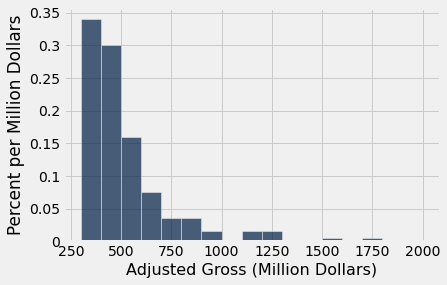

In [10]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

Rappelons que le tableau `bin_counts` contient les comptages dans tous les bins de l'histogramme, spécifiés par `bins=np.arange(300, 2000, 100)`. Rappelez-vous également qu'il y a 200 films en tout.

In [11]:
bin_counts.show(3)

bin,Adjusted Gross count
300,68
400,60
500,32


L'emplacement [300, 400) contient 68 films. Cela représente 34 % de tous les films :

$$
\mbox{Pourcentage} = \frac{68}{200} \cdot 100 = 34
$$

La largeur de la case [300, 400] est de 400 $ - 300 = 100 $. Ainsi, la largeur de l'intervalle [300, 400] est de 400 $ - 300 = 100 $.

$$
\mbox{Hauteur} = \frac{34}{100} = 0.34
$$

**Unités:** La hauteur de la barre est de 34 % divisé par 100 millions de dollars, et la hauteur est donc de 0,34 % par million de dollars.

La hauteur de la barre n'est **pas** le pourcentage d'entrées dans la corbeille. Il s'agit du pourcentage d'entrées dans la corbeille par rapport à l'espace disponible dans la corbeille. C'est pourquoi la hauteur mesure l'encombrement ou la densité. On dit que l'axe vertical se situe sur l'échelle de densité.

#### Pourquoi ne pas simplement tracer les chiffres ?

La principale raison de tracer la densité sur l'axe vertical plutôt que les effectifs ou les pourcentages est de pouvoir comparer les histogrammes et de les rapprocher des courbes lisses où les proportions sont représentées par les surfaces sous la courbe.

Par exemple, plus tard dans le cours, vous verrez des histogrammes qui ont approximativement la forme d'une cloche. La figure ci-dessous illustre une telle forme. La zone ombrée en or représente 95 % de la surface totale sous la courbe. Remarquez que cela est tout à fait crédible sur la base des zones que vous voyez dans la figure, même s'il n'y a pas de chiffres sur les axes. C'est pourquoi nous dessinons les histogrammes de manière à ce que les surfaces représentent des pourcentages.

![courbe en cloche ombrée](images/normal_shaded.png)

Le fait de dessiner des histogrammes sur l'échelle de densité nous permet également de comparer des histogrammes basés sur des ensembles de données de tailles différentes ou sur des choix de cellules différents. Dans ce cas, ni les nombres de cellules ni les pourcentages ne sont directement comparables. Mais si les deux histogrammes sont dessinés sur l'échelle de densité, les surfaces et les densités sont comparables.

Si un histogramme comporte des cases inégales, le tracé sur l'échelle de densité est une condition d'interprétabilité. Pour certaines variables, l'inégalité des bacs peut être naturelle. Par exemple, dans le système éducatif américain, l'école élémentaire comprend les classes 1 à 5, le collège les classes 6 à 8, le lycée les classes 9 à 12, et la licence prend quatre années supplémentaires. Les données sur les années d'études peuvent être regroupées en fonction de ces intervalles. En fait, quelle que soit la variable, les cases ne doivent pas nécessairement être égales. Il est assez courant d'avoir un bac très large à l'extrémité gauche ou droite des données, là où il n'y a pas beaucoup de valeurs.

Traçons un histogramme des recettes brutes ajustées en utilisant des cases inégales, puis voyons ce qui se passe si nous traçons des comptes à la place.

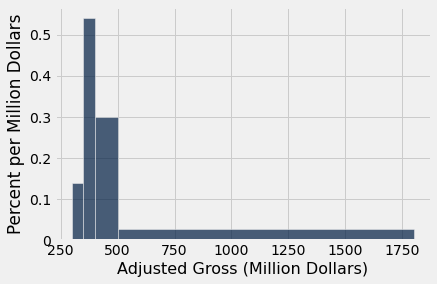

In [12]:
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

Remarquez que la barre [400, 500] a la même hauteur (0,3 % par million de dollars) que dans les histogrammes ci-dessus.

Les surfaces des autres barres représentent les pourcentages dans les cases, comme d'habitude. La méthode `bin` nous permet de voir les effectifs dans chaque cellule.

In [13]:
millions.bin('Adjusted Gross', bins=uneven)

bin,Adjusted Gross count
300,14
350,54
400,60
500,72
1800,0


L'emplacement [300, 350) ne contient que 14 films, alors que l'emplacement [500, 1800] en contient 72. Mais la barre au-dessus de l'emplacement [500, 1800] est beaucoup plus courte que la barre au-dessus de l'emplacement [300, 350). L'emplacement [500, 1800] est si large que ses 72 films sont beaucoup moins encombrés que les 14 films de l'emplacement étroit [300, 350). En d'autres termes, l'intervalle [500, 1800] est moins dense.

Si, au lieu de cela, vous tracez simplement les comptes en utilisant l'option `normed=False` comme indiqué ci-dessous, la figure est complètement différente et représente mal les données.

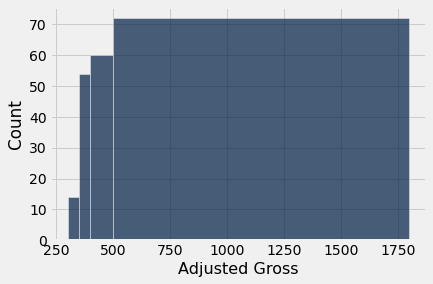

In [14]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)

Même si le terme "historique" a été utilisé, **la figure ci-dessus n'est PAS UN HISTOGRAMME.** Elle exagère de manière trompeuse les films ayant rapporté au moins 500 millions de dollars. La hauteur de chaque barre est simplement représentée par le nombre de films dans la case, sans tenir compte de la différence de largeur des cases. Dans cette figure basée sur le nombre, la forme de la distribution des films est entièrement perdue.

#### Flat Tops et le niveau de détail

Même si l'échelle de densité représente correctement les pourcentages en utilisant la surface, certains détails sont perdus en regroupant les valeurs dans des cases.

Examinez à nouveau le groupe [400, 500] dans la figure ci-dessous. Le sommet plat de la barre, au niveau 0,3 % par million de dollars, cache le fait que les films sont répartis de manière quelque peu inégale dans cette tranche.

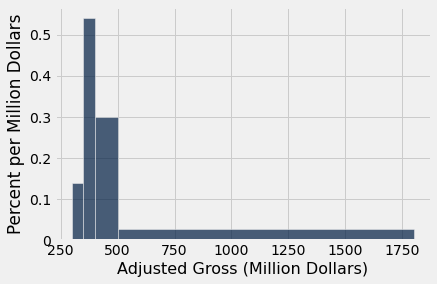

In [15]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

Pour s'en convaincre, divisons l'intervalle [400, 500] en 10 intervalles plus étroits, chacun d'une largeur de 10 millions de dollars.

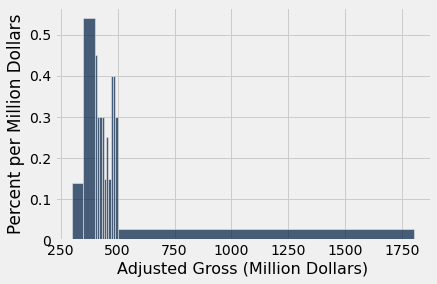

In [16]:
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')

Certaines des barres minces sont plus hautes que 0,3 et d'autres plus courtes. En plaçant un sommet plat au niveau 0,3 pour l'ensemble du bac, nous décidons d'ignorer les détails les plus fins et d'utiliser le niveau plat comme une approximation grossière. Souvent, mais pas toujours, cela suffit pour comprendre la forme générale de la distribution.

**La hauteur comme approximation grossière.
Cette observation nous permet d'envisager la hauteur sous un angle différent.
Reprenons l'exemple de l'intervalle [400, 500] dans les histogrammes précédents. Comme nous l'avons vu, cette case a une largeur de 100 millions de dollars et contient 30 % des données. Par conséquent, la hauteur de la barre correspondante est de 0,3 % par million de dollars.

Considérons à présent que l'histogramme est composé de 100 histogrammes étroits d'une largeur de 1 million de dollars chacun. La hauteur de la barre de "0,3 % par million de dollars" signifie que, de manière approximative, 0,3 % des films se trouvent dans chacun de ces 100 bacs étroits d'une largeur de 1 million de dollars.

Nous disposons de l'ensemble des données utilisées pour dessiner les histogrammes. Nous pouvons donc dessiner les histogrammes avec un niveau de détail aussi fin que le permettent les données et notre patience. Des cellules plus petites permettent d'obtenir une image plus détaillée. Toutefois, si vous regardez un histogramme dans un livre ou sur un site web et que vous n'avez pas accès à l'ensemble des données sous-jacentes, il est important de bien comprendre l'"approximation grossière" créée par les sommets plats.

#### Calculer toutes les hauteurs ###
Nous savons comment trouver la hauteur de chaque barre de l'histogramme. Utilisons-le pour développer un code qui calcule toutes les hauteurs en une seule fois.

Nous utiliserons l'histogramme ci-dessous comme exemple. Les bins sont spécifiés dans le tableau `uneven`.

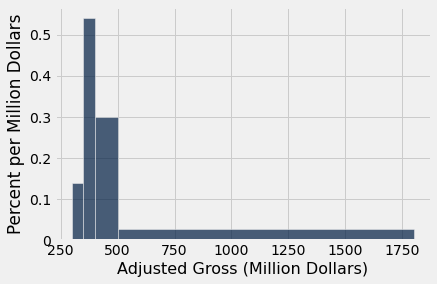

In [17]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

Nous commencerons par faire les comptes dans les bacs.

In [18]:
histogram_elements = millions.bin('Adjusted Gross', bins=uneven).relabeled(1, 'count')
histogram_elements

bin,count
300,14
350,54
400,60
500,72
1800,0


Nous pouvons maintenant ajouter une colonne contenant le pourcentage de chaque case.

In [19]:
total_count = sum(histogram_elements.column('count'))
percents = np.round(100*histogram_elements.column('count')/total_count, 2)
histogram_elements = histogram_elements.with_columns('percent', percents)
histogram_elements

bin,count,percent
300,14,7
350,54,27
400,60,30
500,72,36
1800,0,0


La colonne 0 contient les extrémités gauches de toutes les cases, à l'exception de son dernier élément qui est l'extrémité droite de la dernière case. Nous pouvons donc utiliser `np.diff` pour trouver les largeurs de toutes les cases. Ensuite, nous ajouterons les largeurs au tableau `histogram_elements`, en supprimant d'abord la dernière ligne.

In [20]:
bin_widths = np.diff(histogram_elements.column('bin'))
num_bins = histogram_elements.num_rows - 1    # the number of bins
histogram_elements = histogram_elements.take(
    np.arange(num_bins)).with_columns(
    'width', bin_widths
)
histogram_elements

bin,count,percent,width
300,14,7,50
350,54,27,50
400,60,30,100
500,72,36,1300


Enfin, nous pouvons ajouter une colonne de hauteurs.

In [21]:
heights = np.round(
    histogram_elements.column('percent')/histogram_elements.column('width'),2)
histogram_elements = histogram_elements.with_columns('height', heights)
histogram_elements

bin,count,percent,width,height
300,14,7,50,0.14
350,54,27,50,0.54
400,60,30,100,0.3
500,72,36,1300,0.03


Voici à nouveau l'histogramme pour plus de commodité. Comparez-le au tableau ci-dessus pour confirmer que le calcul des hauteurs est correct.

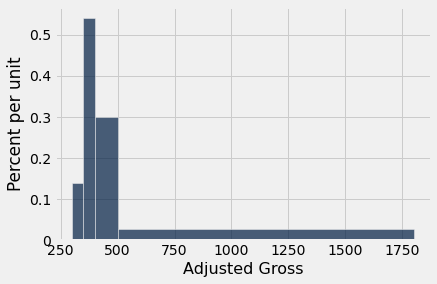

In [22]:
millions.hist('Adjusted Gross', bins=uneven)

#### Différences entre les diagrammes à barres et les histogrammes

- Les diagrammes en bâtons affichent une quantité numérique par catégorie. Ils sont souvent utilisés pour afficher les distributions de variables catégorielles. Les histogrammes affichent les distributions de variables quantitatives.
- Toutes les barres d'un diagramme en bâtons ont la même largeur et l'espace entre les barres consécutives est le même. Les barres peuvent être placées dans n'importe quel ordre car la distribution est catégorielle. Les barres d'un histogramme sont contiguës ; les cases sont tracées à l'échelle sur la droite numérique.
- La longueur (ou la hauteur, si les barres sont dessinées verticalement) des barres d'un diagramme en bâtons est proportionnelle à l'effectif de chaque catégorie. Les hauteurs des barres d'un histogramme mesurent les densités ; les *superficies* des barres d'un histogramme sont proportionnelles aux nombres dans les cases.

In [7]:
from datascience import *
import numpy as np
path_data = 'assets/data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Graphiques superposés

Dans ce chapitre, nous avons appris à visualiser des données en dessinant des graphiques. Une utilisation courante de ces visualisations consiste à comparer deux ensembles de données. Dans cette section, nous verrons comment *couvrir* des graphiques, c'est-à-dire les dessiner dans un seul graphique sur une paire d'axes commune.

Pour que la superposition ait un sens, les graphiques superposés doivent représenter les mêmes variables et être mesurés dans les mêmes unités.

Pour dessiner des graphiques superposés, les méthodes `scatter`, `plot` et `barh` peuvent toutes être appelées de la même manière. Pour `scatter` et `plot`, une colonne doit servir d'axe horizontal commun à tous les graphiques superposés. Pour `barh`, une colonne doit servir d'axe commun qui est l'ensemble des catégories. L'appel général se présente comme suit :

`nom_de_la_table.method(column_label_of_common_axis, array_of_labels_of_variables_to_plot)`

Plus couramment, nous ne sélectionnerons d'abord que les colonnes nécessaires à notre graphique, puis nous appellerons la méthode en spécifiant simplement la variable sur l'axe commun :

`nom_de_la_table.method(column_label_of_common_axis)`


#### Diagrammes de dispersion superposés

La table `sons_heights` fait partie d'un ensemble de données historiques sur les tailles des parents et de leurs enfants. Plus précisément, la population se compose de 179 hommes qui étaient les premiers-nés de leur famille. Les données concernent leur propre taille et celle de leurs parents. Toutes les tailles ont été mesurées en pouces.

In [2]:
sons_heights = Table.read_table(path_data + 'sons_heights.csv')
sons_heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


La méthode `scatter` nous permet de visualiser comment les tailles des fils sont liées aux tailles de leurs deux parents. Dans le graphique, les tailles des fils forment l'axe horizontal commun.

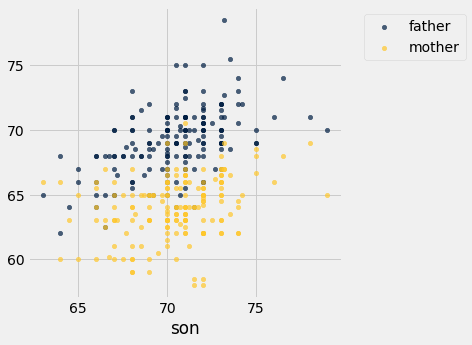

In [3]:
sons_heights.scatter('son')

Remarquez que nous n'avons spécifié que la variable (hauteurs des fils) sur l'axe horizontal commun. Python a dessiné deux diagrammes de dispersion : un pour la relation entre cette variable et les deux autres.

Chaque point représente une ligne du tableau, c'est-à-dire un trio "père, mère, fils". Pour tous les points, l'axe horizontal représente la taille du fils. Dans les points bleus, l'axe vertical représente la taille du père. Dans les points dorés, l'axe vertical représente la taille de la mère.

Les diagrammes de dispersion or et bleu présentent tous deux une pente ascendante et montrent une association positive entre la taille des fils et celle de leurs deux parents. Le diagramme bleu (pères) est en général plus élevé que le doré, car les pères étaient en général plus grands que les mères.

#### Tracés superposés

Notre prochain exemple concerne des données sur des enfants plus récents. Nous reviendrons au tableau de données du recensement `us_pop`, créé ci-dessous à titre de référence. Nous extrairons de ce tableau les chiffres de tous les enfants dans chacune des catégories d'âge de 0 à 18 ans.

In [4]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = Table.read_table(data)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


Nous pouvons maintenant tracer deux courbes superposées, montrant le nombre d'enfants dans les différents groupes d'âge pour chacune des années 2014 et 2019. L'appel est analogue à l'appel `scatter` dans l'exemple précédent.

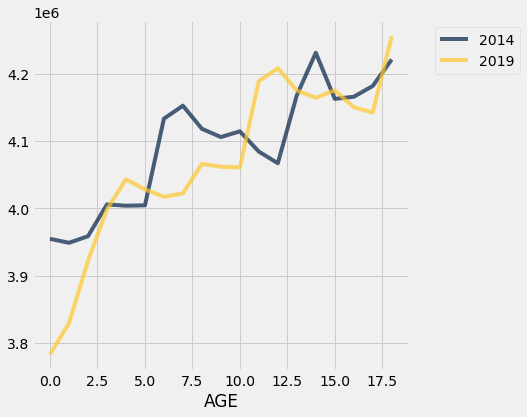

In [10]:
children.plot('AGE')

Bien que les étiquettes de l'axe horizontal comprennent quelques demi-entiers, il est important de se rappeler que nous ne disposons de données que pour les âges 0, 1, 2, et ainsi de suite. Les tracés linéaires "rejoignent les points" entre les deux.

Les deux graphiques se croisent à quelques endroits. Par exemple, il y avait plus d'enfants de 6 ans en 2014 qu'en 2019, et il y avait plus d'enfants de 12 ans en 2019 qu'en 2014.

Bien entendu, les enfants de 12 ans en 2019 sont principalement des enfants qui avaient 7 ans en 2014. Pour le voir sur les graphiques, comparez le graphique doré à l'âge de 12 ans et le graphique bleu à l'âge de 7 ans. Vous remarquerez que le graphique doré (2019) ressemble beaucoup au graphique bleu (2014) qui a glissé de 5 ans vers la droite. Ce glissement s'accompagne d'une légère augmentation due à l'effet net des enfants entrés dans le pays entre 2014 et 2019, qui sont plus nombreux que ceux qui l'ont quitté. Heureusement, à ces âges, il n'y a pas beaucoup de pertes en vies humaines.

#### Diagrammes à barres

La Kaiser Family Foundation a compilé les données du recensement sur la répartition des races et des ethnies aux États-Unis. Le site web de la fondation fournit des compilations de données pour [l'ensemble de la population américaine] (http://kff.org/other/state-indicator/distribution-by-raceethnicity/) en 2019, ainsi que pour [les enfants américains] (http://kff.org/other/state-indicator/children-by-raceethnicity/) qui étaient âgés de moins de 18 ans cette année-là.

Le tableau `usa_ca` est adapté de leurs données pour les États-Unis et la Californie. Les colonnes représentent tous les habitants des États-Unis, tous les habitants de la Californie, les enfants des États-Unis et les enfants de la Californie.

Le corps du tableau contient les pourcentages dans les différentes catégories. Chaque colonne montre la distribution de la variable "origine ethnique/race" dans le groupe de personnes correspondant à cette colonne. Dans chaque colonne, la somme des entrées est donc égale à 100. La catégorie `API` comprend les Asiatiques et les insulaires du Pacifique, y compris les Hawaïens. La catégorie "Autres" comprend les Amérindiens, les natifs de l'Alaska et les personnes qui s'identifient à plusieurs races.

In [14]:
usa_ca = Table.read_table(path_data + 'usa_ca_2019.csv')
usa_ca

Ethnicity/Race,USA All,CA All,USA Children,CA Children
API,5.8,15.1,4.9,11.5
Black,12.2,5.3,13.4,4.9
Hispanic,18.5,39.5,25.6,52.1
White,60.1,36.4,50,25.5
Other,3.4,3.7,6.1,6


Il est naturel de vouloir comparer ces distributions. Il est logique de comparer directement les colonnes, car toutes les entrées sont des pourcentages et se situent donc sur la même échelle.

La méthode `barh` nous permet de visualiser les comparaisons en dessinant plusieurs diagrammes à barres sur les mêmes axes. L'appel est analogue à celui de `scatter` et `plot` : nous devons spécifier l'axe commun des catégories.

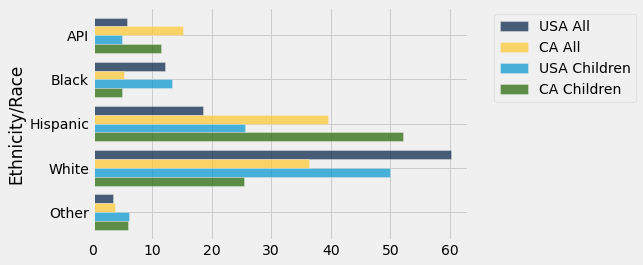

In [15]:
usa_ca.barh('Ethnicity/Race')

Bien que le tracé des diagrammes à barres superposées soit simple, ce graphique contient un peu trop d'informations pour que nous puissions distinguer les similitudes et les différences entre les populations. Il est beaucoup plus facile de comparer les populations une paire à la fois.

Commençons par comparer les populations entières des États-Unis et de la Californie.

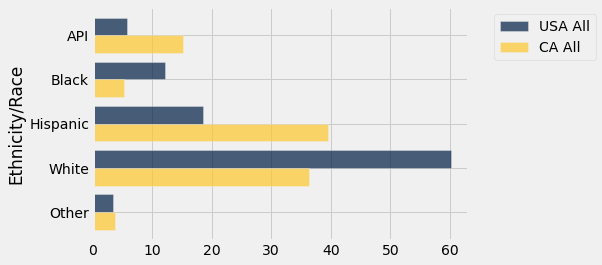

In [16]:
usa_ca.select('Ethnicity/Race', 'USA All', 'CA All').barh('Ethnicity/Race')

Les deux distributions sont très différentes. La Californie a des pourcentages plus élevés dans les catégories `API` et `Hispanique`, et des pourcentages proportionnellement plus faibles dans les catégories `Noir` et `Blanc`. Les pourcentages dans la catégorie "Autres" sont assez similaires dans les deux populations. Les différences sont en grande partie dues à la situation géographique de la Californie et aux schémas d'immigration et de migration, à la fois dans le passé et au cours des dernières décennies.

Comme le montre le graphique, près de 40 % de la population californienne en 2019 était "hispanique". Une comparaison avec la population d'enfants dans l'État indique que la proportion d'"hispaniques" est susceptible d'être plus importante dans les années à venir. Parmi les enfants californiens en 2019, plus de 50 % appartenaient à la catégorie "hispanique".

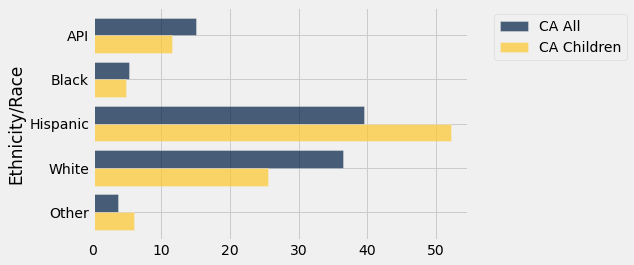

In [18]:
usa_ca.select('Ethnicity/Race', 'CA All', 'CA Children').barh('Ethnicity/Race')

Les ensembles de données plus complexes donnent naturellement lieu à des visualisations variées et intéressantes, y compris des graphiques superposés de différents types. Pour analyser de telles données, il est utile d'avoir quelques compétences supplémentaires en matière de manipulation des données, afin de pouvoir les mettre sous une forme qui nous permette d'utiliser des méthodes telles que celles présentées dans cette section. Dans le prochain chapitre, nous développerons certaines de ces compétences.

# Crédits

Ce cours est inspiré du cours data8 donné à UC Berkeley et en ré-utilise avec certaines modifications une partie des matériels (ces matériels sont généreusement mis à disposition publiquement sous licence Creative Commons avec attribution, consultez [https://www.data8.org](https://www.data8.org) pour plus d'informations.